# PROGETTO ANALISI DATI


Alessandra Bottiglieri 648769 a.bottiglieri1@studenti.unipi.it
<br/>Arianna Di Serio 589987 a.diserio1@studenti.unipi.it
<br/>Caterina Piagentini 626023  c.piagentini1@studenti.unipi.it
<br/>Giorgia Cestaro 620023 g.cestaro@studeni.unipi.it


Nel seguente report, mediante l'utilizzo di statistica descrittiva e visuale, si analizza la composizione del dataset [HrDataset_v14](https://www.kaggle.com/rhuebner/human-resources-data-set). L'analisi condotta consente di rispondere a domande inerenti la composizione del personale aziendale (per individuare eventuali discriminazioni di etnia o genere, il loro benessere all'interno dell'azienda, ecc...), e individuare possibili correlazioni tra variabili. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
%matplotlib inline
import scipy.stats as sp
from scipy.stats import trim_mean, kurtosis
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import plotly.express as px
from statistics import mode

In [2]:
py.offline.init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

In [4]:
df = pd.read_csv("HRDataset_v14.csv",encoding ='latin-1')

In [5]:
df.head()

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Analisi di valori nulli nel dataset
Prima di procedere con un'analisi quantitativa del dataset, andiamo ad individuare eventuali valori nulli. Eseguendo un controllo, si conferma la presenza di valori nulli (segnati con "True") unicamente per gli attributi "DateofTermination" e "ManagerID".

In [6]:
df.isna().any()

ï»¿Employee_Name              False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

# 1. Analisi dell'azienda: tipologia di impiegati, dipendenti per dipartimento, piattaforme di recruitment

## 1.1 Percentuale di impiegati uomo e donna 

I grafici sottostanti mostrano le percentuali di impiegati uomo e donna nell'azienda. Dal primo pie chart (a sinistra) è possibile osservare la composizione di tutto il personale aziendale, inclusi i dipendenti che hanno ormai lasciato l'azienda. Le donne rappresentano la maggior parte del personale aziendale (56.6%). 
<br/>Per ottenere una fotografia realistica della distribuzione abbiamo anche scelto di prendere in considerazione unicamente i dipendenti ancora in servizio, escludendo dunque quelli che hanno lasciato l'azienda. Il valore è in ogni caso simile: le donne sono la maggioranza (56%).
Questa percentuale risulta essere leggermente superiore al dato fornito dal [Bureau of Labor Statistics](https://www.cnbc.com/2020/01/14/why-more-women-are-working-in-the-us-than-men.html) nel 2020: in quell’anno, la percentuale di lavoratrici negli Stati Uniti era del 50.04%.

In [7]:
men = df[df["GenderID"] == 1] 
women = df[df["GenderID"] == 0]

In [8]:
df_attuale = df[df["Termd"] == 0] 
men2 = df_attuale[df_attuale["GenderID"] == 1] 
women2 = df_attuale[df_attuale["GenderID"] == 0]

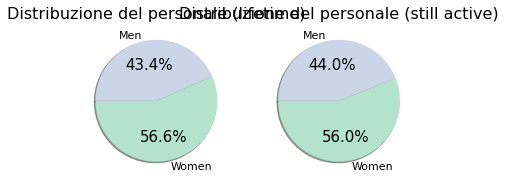

In [9]:
plt.subplot(1,2,1)
countW = women.shape[0]
countM = men.shape[0]
labels = ["Women", "Men"]
sizes = [countW, countM]
colors = ['#b3e2cd','#cbd5e8']
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_context("notebook", font_scale=1, rc={"font.size":15,"axes.titlesize":16,"axes.labelsize":16})
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)
plt.title('Distribuzione del personale (lifetime)')

plt.subplot(1,2,2)
countW = women2.shape[0]
countM = men2.shape[0]
labels = ["Women", "Men"]
sizes = [countW, countM]
colors = ['#b3e2cd','#cbd5e8']
plt.rcParams["figure.figsize"] = [20, 10]
sns.set_context("notebook", font_scale=1, rc={"font.size":15,"axes.titlesize":16,"axes.labelsize":16})
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)
plt.title('Distribuzione del personale (still active)')
plt.show()

## 1.2 Distribuzione delle razze tra gli impiegati

Il grafico a barre mostra il numero di impiegati per ogni popolazione presente all’interno dell’azienda. È facile notare come ci sia una netta prevalenza di impiegati *White* (187), seguiti da *Black or African American* (80), mentre la categoria meno presente è quella rappresentata da impiegati esclusivamente *Hispanic*, che conta infatti una persona. 
<br/>Secondo un recente [report BLS](https://www.bls.gov/opub/reports/race-and-ethnicity/2018/home.htm#:~:text=The%20employment%E2%80%93population%20ratio%20was,and%2063.2%20percent%20for%20Hispanics.), nel 2018 la popolazione bianca rappresentava il 78% della forza lavoro negli Stati Uniti, la popolazione afroamericana il 13%, quella asiatica il 6%. Nel presente database, il segmento *White* risulta essere inferiore alla media, mentre il segmento *Black or African American* appare essere superiore, così come quello *Asian*.

In [10]:
sizesRace = df['RaceDesc'].value_counts()
print(sizesRace)

White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64


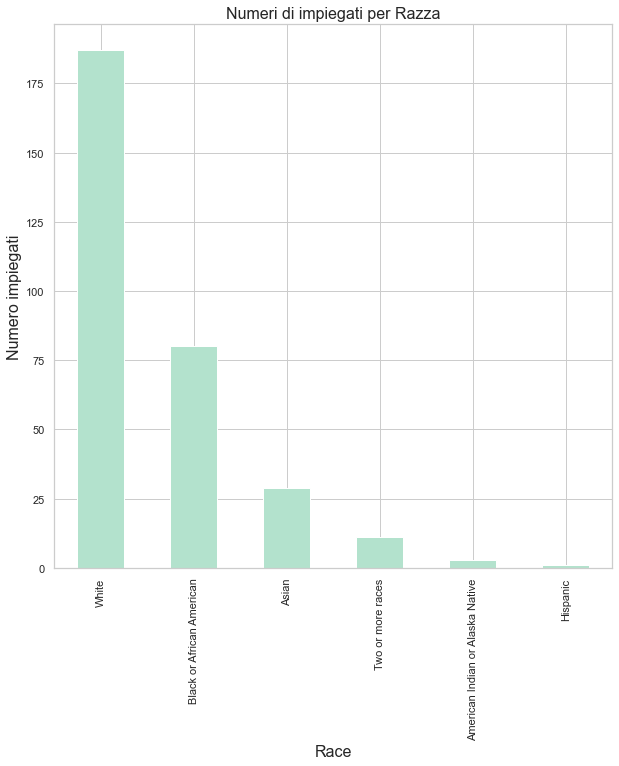

In [11]:
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = [10,10]
sizesRace.plot(kind='bar', color = "#b3e2cd")
plt.title("Numeri di impiegati per Razza")
plt.xlabel("Race")
plt.ylabel("Numero impiegati")
plt.show()

## 1.3 Percentuale di impiegati per stato civile

Il grafico sottostante dà una rappresentazione dello stato civile degli impiegati dell'azienda utilizzando la variabile qualitativa MaritalDesc, mostrando come ci sia una netta prevalenza di single e sposati, che nell'insieme risultano essere l'84% del totale. 
<br/>Come ci aspettavamo la categoria meno presente è quella dei vedovi, stato civile tipico di una fascia di età avanzata.
<br/>Vista la simile percentuale di impiegati *single* e *married*, potremmo dedurre che la vita lavorativa dell’azienda è conciliabile con esigenze familiari diverse.
<br/>Questo risultato è inoltre ragionevole se si tiene presente che la fascia d'età prevalente in azienda è quella di età 29-39, mentre quelle meno presenti sono le fasce 50-59 e 60-71, e in cui probabilmente ricadono gli impiegati divorziati, vedovi o separati. L'analisi degli impiegati per fasce d'età è illustrata nel punto [1.6](#ref).

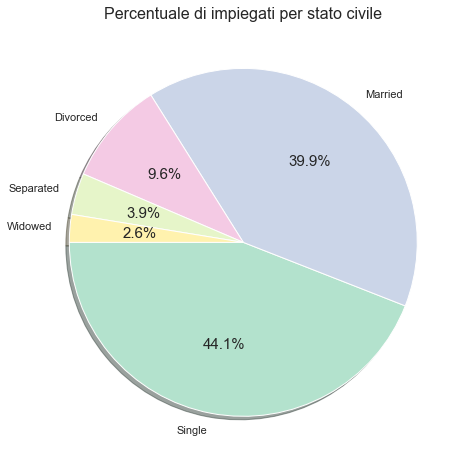

In [12]:
labelsMD = ['Single', 'Married', 'Divorced', "Separated", "Widowed"]
sizesMD = df['MaritalDesc'].value_counts()
colors = ['#b3e2cd','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae']
plt.rcParams["figure.figsize"] = [8,8]
plt.pie(sizesMD, labels = labelsMD, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)
plt.title("Percentuale di impiegati per stato civile")
plt.show()

***

<font color='green' size='4px'>Grafico interattivo</font>

In [13]:
px.pie(df, values = sizesMD, names = labelsMD, title = "Percentuale di impiegati per stato civile")

### 1.3.1 Numero impiegati uomo/donna per stato civile

Osserviamo di seguito, tramite BarPlot, la distribuzione di uomini e donne all'interno dell'azienda secondo i diversi stati civili, con il relativo numero di impiegati per stato. 
<br/>Dal momento che il numero di donne in azienda è maggiore rispetto a quello degli uomini, si è optato per analizzare la distribuzione all'interno dei due gruppi tramite pie chart per un confronto più oggettivo: osservando i due grafici, la differenza più significativa che risulta esserci tra i segmenti è quella relativa allo stato civile *Separati* (mentre le donne separate sono il 5.1%, gli uomini separati sono il 3%).

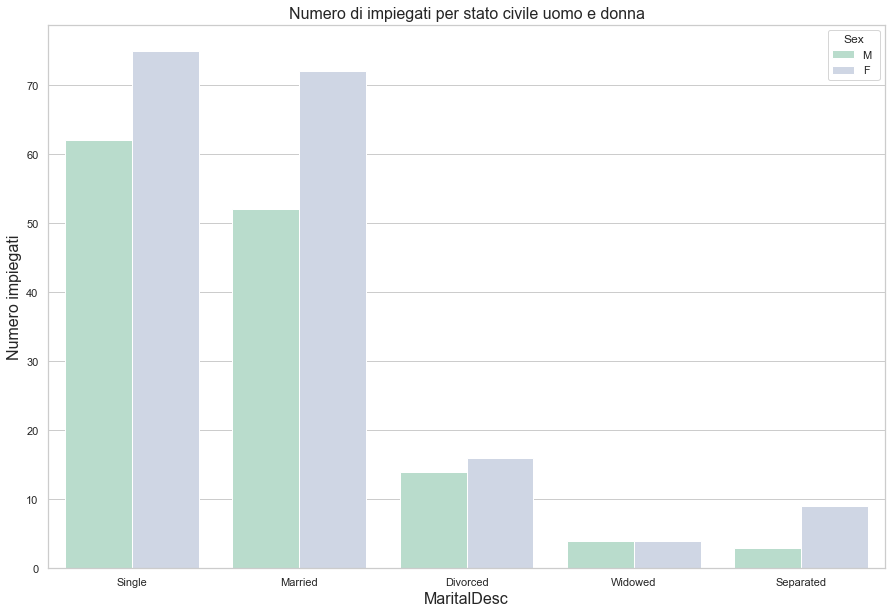

In [14]:
plt.rcParams["figure.figsize"] = [15, 10]
colors = ['#b3e2cd','#cbd5e8']
sns.countplot(x='MaritalDesc',hue='Sex',data=df, palette = sns.color_palette(colors))
plt.title("Numero di impiegati per stato civile uomo e donna")
plt.ylabel("Numero impiegati")
plt.show()

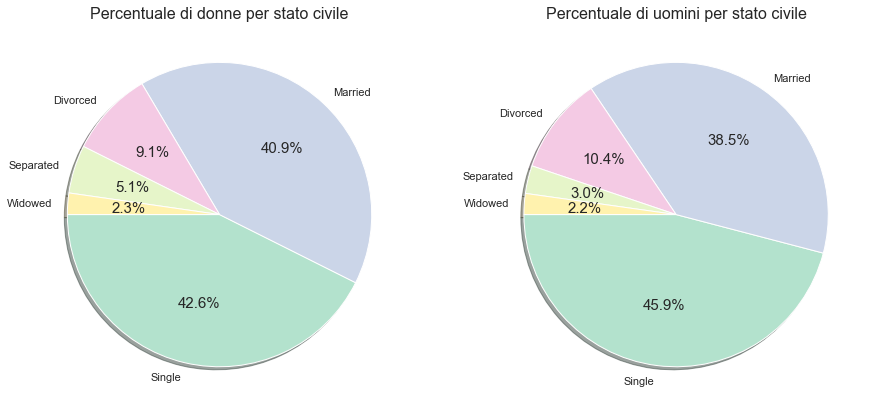

In [15]:
plt.subplot(1,2,1)
labelsMD = ['Single', 'Married', 'Divorced', "Separated", "Widowed"]
sizesMD = women['MaritalDesc'].value_counts()
colors = ['#b3e2cd','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae']
plt.rcParams["figure.figsize"] = [15,15]
plt.pie(sizesMD, labels = labelsMD, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)
plt.title("Percentuale di donne per stato civile")

plt.subplot(1,2,2)
labelsMD = ['Single', 'Married', 'Divorced', "Separated", "Widowed"]
sizesMD = men['MaritalDesc'].value_counts()
colors = ['#b3e2cd','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae']
plt.rcParams["figure.figsize"] = [15,15]
plt.pie(sizesMD, labels = labelsMD, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)
plt.title("Percentuale di uomini per stato civile")
plt.show()

## 1.4 Numero di impiegati per dipartimento

Il grafico sottostante mostra il numero di impiegati per ogni dipartimento aziendale.
<br/>La maggior parte del personale è relativo al dipartimento Production (209 dipendenti), con un'importante differenza rispetto agli altri dipartimenti: IT/IS, al secondo posto, conta ad esempio solo 50 impiegati. Admin Offices e Executive Office sono i dipartimenti con meno personale (9 e 1).
<br/>I numeri sono comunque ragionevoli se si pensa al fatto che l'attività produttiva in un'azienda sia quella che richiede maggiore manodopera, mentre i reparti di amministrazione coinvolgono generalmente solo un numero limitato di persone. 

In [16]:
plt.rcParams["figure.figsize"] = [10, 5]
sizesDept = df['Department'].value_counts()
px.bar(sizesDept, title = "Numero di impiegati per dipartimento")

### 1.4.1 Distribuzione degli impiegati per dipartimento in base al genere

Svolgendo un'analisi più approfondita, è possibile fare una distinzione tra il numero di uomini e di donne all'interno di ogni dipartimento. 
<br/> Lo stacked bar sottostante mostra come le donne rappresentino la maggioranza nel reparto di Produzione (126 donne contro 83 uomini) e di Admin Office (6 donne e 3 uomini). Non ci sono invece importanti differenze per quanto riguarda i reparti Software Engineering (6 donne e 5 uomini), Sales (15 donne e 16 uomini), IT/IS (22 donne e 28 uomini). Il reparto Executive Office conta un solo impiegato, donna.
<br></br>In generale, si può affermare che l'azienda non segua particolari preferenze di genere nell'assumere i dipendenti di ciascun dipartimento. Tenendo anche conto della maggioranza di impiegati donna, quest'ultime prevalgono in molteplici settori, anche amministrativi.

In [17]:
gender_xt = pd.crosstab(df['Sex'], df['Department'])
print(gender_xt)

Department  Admin Offices  Executive Office  IT/IS  Production         Sales  \
Sex                                                                            
F                       6                 1     22                126     15   
M                       3                 0     28                 83     16   

Department  Software Engineering  
Sex                               
F                              6  
M                              5  


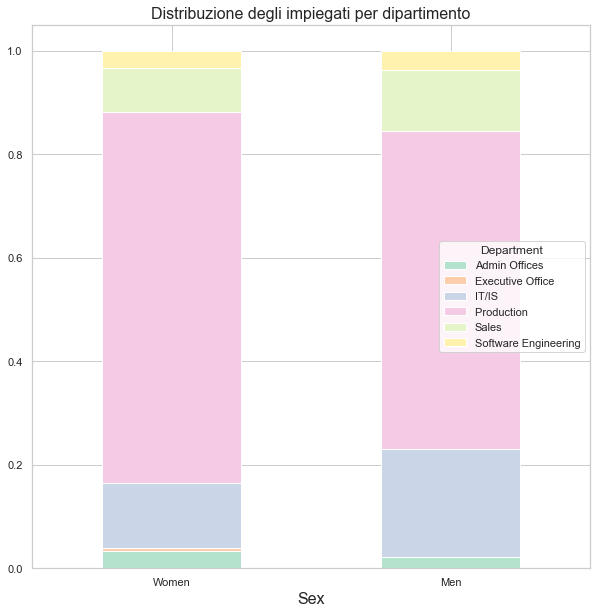

In [18]:
gender_xt_pct = gender_xt.div(gender_xt.sum(1).astype(float), axis=0)
plt.rcParams["figure.figsize"] = [10, 10]
gender_xt_pct.plot(kind='bar', stacked=True, color = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae'])
plt.title('Distribuzione degli impiegati per dipartimento')
plt.xticks([0, 1], ['Women', 'Men'], rotation=0)
plt.show()

## 1.5 Piattaforme di Recruitment

Il grafico interattivo sottostante mostra le piattaforme di Recruitment utilizzate per assumere gli impiegati dell'azienda. Da esso è possibile osservare che le piattaforme più utilizzate sono online (nello specifico Indeed, LinkedIn, Google Search).

In [19]:
sizesRecruitment = df['RecruitmentSource'].value_counts()
px.bar(sizesRecruitment, title = "Piattaforme di recruitment")

### 1.5.1 Piattaforme di Recruitment per età

Le piattaforme online sono generalmente preferite da una popolazione più giovane. Questa considerazione si riflette nello stacked bar graph sottostante, il quale evidenzia come la fascia degli impiegati più giovani dai 29 ai 39 anni (in verde) sia maggiore nelle piattaforme di recruitment digitali più recenti come Website, Indeed, Google Search e LinkedIn. In relazione a quest'ultimo, ad esempio, il valore è in linea con i dati stimati dall'indagine [The 2021 Social Media Demographics Guide](https://khoros.com/resources/social-media-demographics-guide) condotta da [Koros](https://khoros.com/) nel 2021, la quale afferma che il 60% degli iscritti di LinkedIn è nella fascia di età compresa tra i 25 e 34 anni, il 17% in quella 35-54 anni.
<br/>La categoria *Online Web application* è invece sfruttata unicamente dalla fascia 40-49, che comprende però un unico impiegato.

In [20]:
# FUNZIONE PER IL CALCOLO DELL'ETA' DEGLI IMPIEGATI
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year

In [21]:
df2 = df.copy()
df2['DOB'] = pd.to_datetime(df.DOB)
now = pd.Timestamp('now')
df2['DOB'] = df2['DOB'].where(df2['DOB'] < now, df2['DOB'] -  np.timedelta64(100, 'Y'))
df2['age'] = (now - df2['DOB']).astype('<m8[Y]')

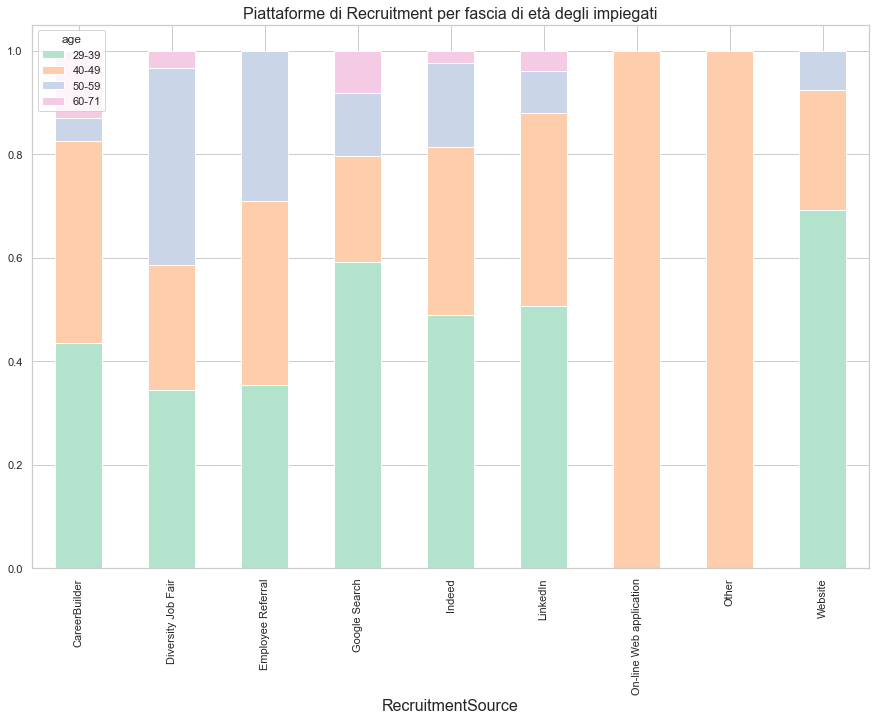

In [22]:
df_bins = df2.copy()
df_bins['age'] = pd.cut(df_bins.age,bins=[29,40,50,60,71],labels=['29-39','40-49','50-59','60-71'])
age_xt = pd.crosstab(df['RecruitmentSource'], df_bins['age'])
age_xt_pct = age_xt.div(age_xt.sum(1).astype(float), axis=0)
plt.rcParams["figure.figsize"] = [15, 10]
age_xt_pct.plot(kind='bar', stacked=True, color = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4'], title='Piattaforme di Recruitment per fascia di età degli impiegati')
plt.show()

In [23]:
print(age_xt)

age                      29-39  40-49  50-59  60-71
RecruitmentSource                                  
CareerBuilder               10      9      1      3
Diversity Job Fair          10      7     11      1
Employee Referral           11     11      9      0
Google Search               29     10      6      4
Indeed                      42     28     14      2
LinkedIn                    38     28      6      3
On-line Web application      0      1      0      0
Other                        0      2      0      0
Website                      9      3      1      0


Dal pie chart sottostante è invece possibile osservare la distribuzione degli impiegati in azienda per le diverse fasce d'età.

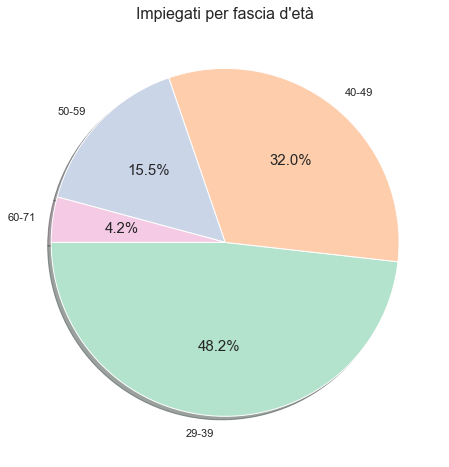

In [24]:
labelsMD = ['29-39','40-49','50-59','60-71']
sizesMD = df_bins['age'].value_counts()
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4']
plt.rcParams["figure.figsize"] = [8,8]
plt.pie(sizesMD, labels = labelsMD, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)
plt.title("Impiegati per fascia d'età")
plt.show()

## 1.6 Distribuzione impiegati sulla base dell'età e del genere<a name="ref"/>

Dal grafico sottostante è possibile notare che: per quanto riguarda le donne, si riscontra una maggiore presenza del range d'età compreso tra 29-39 anni (che conta 81 lavoratrici), mentre al crescere delle fasce d'età il numero di impiegati diminuisce; per quanto riguarda il genere maschile, il massimo numero di impiegati è 67, appartenenti al range 29-39 anni, per poi avere anche qui un decremento del numero di dipendenti con l'aumentare dell'età. 
<br/>Osserviamo quindi come la distribuzione per le diverse fasce di età sia estremamente simile tra i due generi e che la maggior parte degli impiegati rientri nella fascia più giovane (29-39).

In [25]:
age_xt = pd.crosstab(df['Sex'], df_bins['age'])
print(age_xt)

age  29-39  40-49  50-59  60-71
Sex                            
F       82     57     26     10
M       67     42     22      3


In [26]:
df_bins["age"].describe()

count       309
unique        4
top       29-39
freq        149
Name: age, dtype: object

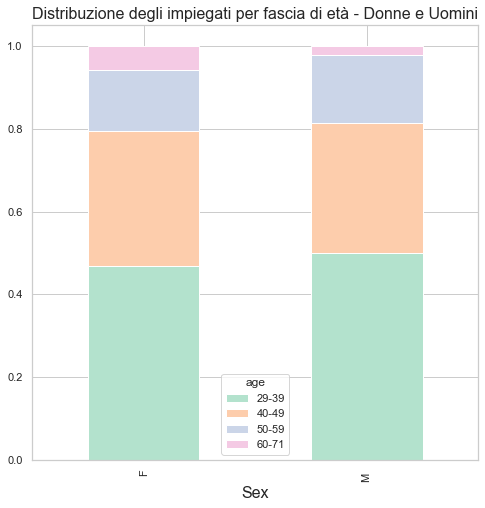

In [27]:
age_xt_pct = age_xt.div(age_xt.sum(1).astype(float), axis=0)
age_xt_pct.plot(kind='bar', stacked=True, color = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4'], title='Distribuzione degli impiegati per fascia di età - Donne e Uomini')
plt.show()

## 1.7 Numero di progetti speciali per età

Il grafico sottostante mostra come i progetti speciali siano distributi tra gli impiegati in base all'età.
<br/>La maggior parte dei progetti sono destinati ad impiegati giovani, tra i 30 e i 45 anni. Pochi sono quelli invece assegnati ad impiegati che superano i 50 anni o troppo giovani (<30 anni).
<br/>In generale sono comunque poichi i progetti portati avanti (la maggior parte degli impiegati, per tutte le età, ne svolge 0).

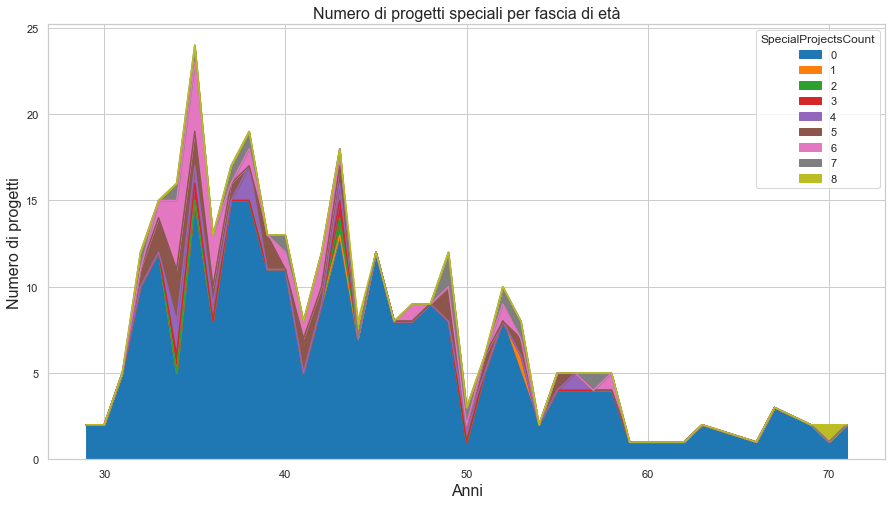

In [28]:
Summary = pd.crosstab(df2['age'], df2['SpecialProjectsCount'])
plt.rcParams["figure.figsize"] = [15,8]
Summary.plot(kind="area",stacked=True)
plt.title("Numero di progetti speciali per fascia di età")
plt.ylabel("Numero di progetti")
plt.xlabel("Anni")
plt.show()

In [29]:
df["SpecialProjectsCount"].describe()

count    311.000000
mean       1.218650
std        2.349421
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: SpecialProjectsCount, dtype: float64

# 2. Analisi di eventuali differenze uomo/donna, per razza o cittadinanza

## 2.1 Salario medio uomo e donna

Il grafico a barre sottostante mostra il salario medio dei dipendenti uomini e donne dell'azienda, per valutare e mostrare graficamente un'eventuale differenza significativa tra i due.
<br/>Dal grafico è in realtà evidente l'assenza di discrepanze rilevanti tra i salari.

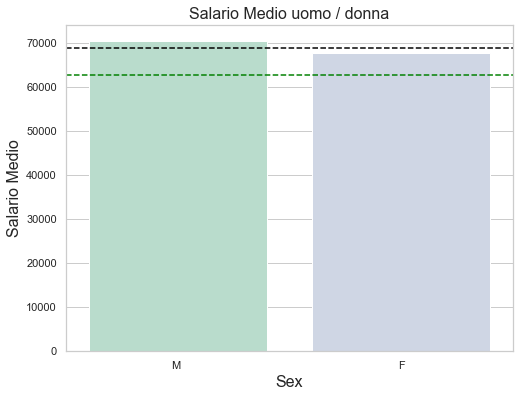

In [30]:
plt.rcParams["figure.figsize"] = [8,6]
plt.title("Salario Medio uomo / donna")
colors = ['#b3e2cd','#cbd5e8']
sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
sns.barplot(x="Sex", y="Salary", palette = sns.color_palette(colors), data=df, ci=None)
plt.xlabel("Sex")
plt.ylabel("Salario Medio")
plt.axhline(df["Salary"].mean(), color="k", linestyle="--")
plt.axhline(df["Salary"].median(), color="g", linestyle="--")
plt.show()

In [31]:
df["Salary"].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [32]:
SalaryW = women["Salary"].mean()
SalaryM = men["Salary"].mean()
GPG = SalaryM - SalaryW
moda = mode(df["Salary"])
print("Moda:", moda, "$")
print("Salario medio uomini:", round(SalaryM), "$\tSalario medio donne:", round(SalaryW), "$\tGenderPayGap:", round(GPG), "$")

Moda: 57815 $
Salario medio uomini: 70629 $	Salario medio donne: 67787 $	GenderPayGap: 2843 $


In [33]:
SalaryW2 = women["Salary"].median()
SalaryM2 = men["Salary"].median()
GPG2 = SalaryM2 - SalaryW2

print("Salario mediano uomini:", round(SalaryM2), "$\tSalario mediano donne:", round(SalaryW2), "$\tGenderPayGap:", round(GPG2), "$")

Salario mediano uomini: 63353 $	Salario mediano donne: 62066 $	GenderPayGap: 1286 $


I valori medi per genere sono anche in linea con la media e la mediana di *Salary*.
</br>Per fare delle osservazioni più accurate, occorre tener conto della mediana piuttosto che della media, valore poco robusto (lo evinciamo dal fatto che la deviazione standar è maggior del suo 30%).

In [34]:
stati = df["State"].value_counts()
print(stati.head(3))

MA    276
CT      6
TX      3
Name: State, dtype: int64


Il salario medio per gli uomini è di 70.629\\$, per le donne di 67.787\\$, con un Gender Gap di 2.843\\$.
<br></br>Questi dati possono essere confrontati con un'indagine condotta nel 2019 dallo [United State Census Bureau](https://www.census.gov/), dalla quale è emerso che in America il Gender Pay Gap, nel suddetto anno, è stato mediamente di 10.150\\$. Lo stipendio medio per gli uomini era di 53.544\\$ all'anno, mentre per le donne di 43.394\\$.
<br/>Dal seguente [Tableau](https://public.tableau.com/views/GenderPayGapMap_16461609104250/USA_Dashboard?:showVizHome=no), è possibile avere dei dati più approfonditi relativi ad ogni Stato americano: per questo confronto ci concentreremo sul Massachusetts. Analizzando il campo 'State' del dataframe si nota infatti che quasi tutti i dipendenti provengono dal Massachusetts, per cui è lecito dedurre che l'azienda risieda in tale Stato. L'indagine parla di un Gender Pay Gap in Massachusetts di 13,217\\$.
<br/>Rispetto a questi dati, dunque, l'azienda analizzata si discosta significativamente: il suo Gender Pay Gap è inferiore del 80\% circa, i salari sono decisamente più alti sia per donne che per uomini.

## 2.2 Differenze salario uomo / donna per dipartimento

Il barplot sottostante mostra i salari medi uomo/donna per i vari dipartimenti dell'azienda. 
<br/>In linea generale, nessun reparto sembra fare discriminazioni di genere per quanto riguarda il salario: non vi sono infatti discrepanze significative. 
<br/>L'*Executive Office* è composto da una sola impiegata, pertanto il grafico non riporta dati per la categoria Uomini.

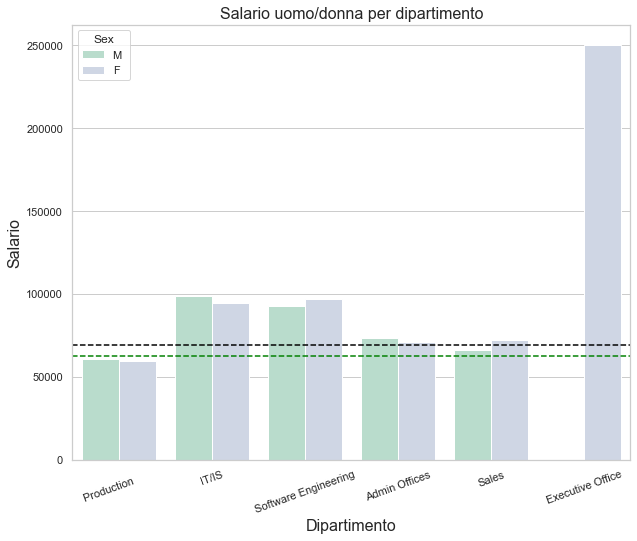

In [35]:
colors = ['#b3e2cd','#cbd5e8']
plt.rcParams["figure.figsize"] = [10,8]
sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("whitegrid")
sns.barplot(x="Department", y="Salary", hue="Sex", palette = sns.color_palette(colors), data=df, ci=None)
plt.title("Salario uomo/donna per dipartimento")
plt.xticks(rotation=20)
plt.xlabel("Dipartimento")
plt.ylabel("Salario")
plt.axhline(df["Salary"].mean(), color="k", linestyle="--")
plt.axhline(df["Salary"].median(), color="g", linestyle="--")
plt.show()

## 2.3 Differenze di salario tra impiegati di razze diverse

Il grafico sottostante è un BarPlot rappresentante le differenze di salario medio tra impiegati di razze diverse.
<br/>Da tale grafico è possibile notare che i salari sono abbastanza simili, distribuiti principalmente nel range 60.000\\$ - 70.000\\$.
<br/>Calcolando la mediana (non consideriamo la media poiché in questo caso poco significativa e robusta, la deviazione standard è infatti maggiore del suo 30\%) otteniamo per l'appunto un salario di 62.810\\$.
<br/>A distinguersi è solo il salario medio della categoria *Hispanic* (in giallo), di circa 83.000\\$, valore più alto rispetto a quello delle restanti categorie. 
<br/>Questo valore è dovuto al fatto che tale categoria conta un solo impiegato, la cui posizione è *Production Manager*: lo stipendio è dunque più alto rispetto, ad esempio, ad impiegati del reparto *Production* che sono invece la maggioranza (assieme a *Sales Manager*) nella categoria *Two or more races*.

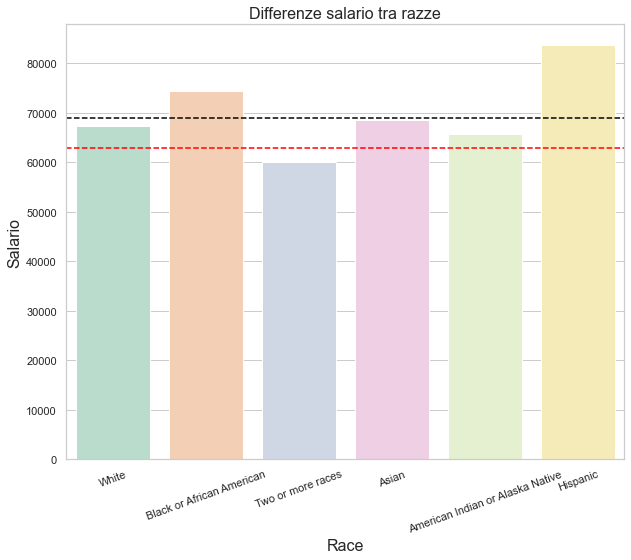

In [36]:
plt.rcParams["figure.figsize"] = [10,8]
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae']
sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":16})
sns.barplot(x="RaceDesc",y="Salary", palette = sns.color_palette(colors), data=df, ci=None)
sns.set_style("whitegrid")
plt.title("Differenze salario tra razze")
plt.xlabel("Race")
plt.ylabel("Salario")
plt.axhline(df["Salary"].mean(), color="k", linestyle="--")
plt.axhline(df["Salary"].median(), color="r", linestyle="--")
plt.xticks(rotation=20)
plt.show()

In [37]:
# LA DESCRIBE PERMETTE DI VISUALIZZARE MEDIA, MEDIANA E DEVIAZIONE STANDARD (il cui valore ci dice se la media è affidabile)
df["Salary"].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [38]:
# ANALISI DELLA CATEGORIA HISPANIC
Hispanic = df[df["RaceDesc"] == "Hispanic"]
countH = Hispanic.shape
salarioMedio = Hispanic["Salary"].mean()
positions = Hispanic["Position"].reset_index(drop=True)
print("Numero di Hispanic:", countH[0], "\nPosizione:", positions[0], "\nSalario:", round(salarioMedio))

Numero di Hispanic: 1 
Posizione: Production Manager 
Salario: 83667


In [39]:
# ANALISI DELLA CATEGORIA TWO OR MORE RACES
TwoorMore = df[df["RaceDesc"] == "Two or more races"]
countH = TwoorMore.shape[0]
positions = TwoorMore["Position"].reset_index(drop=True)
salari = TwoorMore["Salary"].reset_index(drop=True)
print("Numero di \'Two or more races\':", countH)
for i in range(countH):
    print("Salario:", salari[i], "\tPosizione:", positions[i])

Numero di 'Two or more races': 11
Salario: 58709 	Posizione: Production Technician I
Salario: 56294 	Posizione: Production Technician II
Salario: 61568 	Posizione: Area Sales Manager
Salario: 57815 	Posizione: Production Technician I
Salario: 71707 	Posizione: Area Sales Manager
Salario: 68407 	Posizione: Production Technician II
Salario: 63291 	Posizione: Area Sales Manager
Salario: 63695 	Posizione: Area Sales Manager
Salario: 52674 	Posizione: Production Technician I
Salario: 47961 	Posizione: Production Technician I
Salario: 57859 	Posizione: Area Sales Manager


In [40]:
# DESCRIBE
Hispanic["Salary"].describe()

count        1.0
mean     83667.0
std          NaN
min      83667.0
25%      83667.0
50%      83667.0
75%      83667.0
max      83667.0
Name: Salary, dtype: float64

In [41]:
TwoorMore["Salary"].describe()

count       11.000000
mean     59998.181818
std       6767.871243
min      47961.000000
25%      57054.500000
50%      58709.000000
75%      63493.000000
max      71707.000000
Name: Salary, dtype: float64

In [42]:
Asian = df[df["RaceDesc"] == "Asian"]
Asian["Salary"].describe()

count        29.000000
mean      68521.206897
std       18046.292936
min       45046.000000
25%       55875.000000
50%       64724.000000
75%       81584.000000
max      107226.000000
Name: Salary, dtype: float64

In [43]:
White = df[df["RaceDesc"] == "White"]
White["Salary"].describe()

count       187.000000
mean      67287.545455
std       24876.378354
min       45069.000000
25%       55282.500000
50%       62068.000000
75%       68914.000000
max      250000.000000
Name: Salary, dtype: float64

In [44]:
BOAA = df[df["RaceDesc"] == "Black or African American"]
BOAA["Salary"].describe()

count        80.000000
mean      74431.025000
std       29210.170216
min       46654.000000
25%       55236.250000
50%       64069.000000
75%       81224.750000
max      178000.000000
Name: Salary, dtype: float64

In [45]:
AIAN = df[df["RaceDesc"] == "American Indian or Alaska Native"]
AIAN["Salary"].describe()

count        3.000000
mean     65806.000000
std       4919.476293
min      60724.000000
25%      63436.500000
50%      66149.000000
75%      68347.000000
max      70545.000000
Name: Salary, dtype: float64

## 2.4 Distribuzione salario per dipartimento

Il boxplot sottostante mostra la distribuzione dello stipendio nei diversi dipartimenti dell'azienda.
<br/>Notiamo che gli *Admin Offices* hanno una varietà salariale maggiore rispetto agli altri dipartimenti, con una mediana che si posiziona nella fascia inferiore. 
<br/>Il settore *IT/IS* è quello che presenta un numero più elevato di outliers, seguito dal settore *Production*: questo aspetto è da ricondurre alla presenza, nei vari reparti, di un numero ridotto di figure con posizione di Manager o Director, le quali hanno per l'appunto salari decisamente più alti rispetto ai restanti dipendenti.
<br/>Dal grafico è stato eliminato il dipartimento *Executive Office*, poichè formato da un solo impiegato, con salario pari a 250.000\\$.

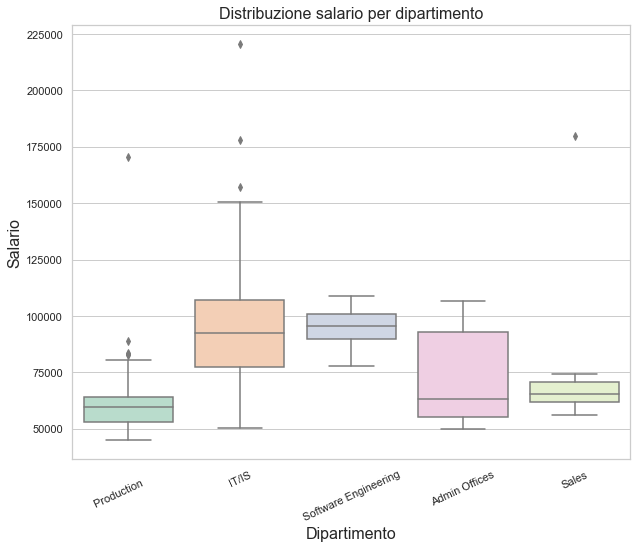

In [46]:
df2 = df[df['Salary'] < 250000 ]
plt.rcParams["figure.figsize"] = [10, 8]
sns.set_context("notebook", font_scale=1, rc={"font.size":15,"axes.titlesize":16,"axes.labelsize":16})
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9']
sns.boxplot(x='Department',y='Salary', palette = sns.color_palette(colors), data=df2)
plt.title("Distribuzione salario per dipartimento")
plt.xlabel("Dipartimento")
plt.ylabel("Salario")
plt.xticks(rotation=25)
plt.show()

In [47]:
df["Department"].describe()

count                   311
unique                    6
top       Production       
freq                    209
Name: Department, dtype: object

In [48]:
a = df[df["Department"] == "Production       "]
print("Production:\n", a["Salary"].describe())
b = df[df["Department"] == "IT/IS"]
print("\nIT/IS:\n", b["Salary"].describe())
c = df[df["Department"] == "Software Engineering"]
print("\nSoftware Engineering:\n", c["Salary"].describe())
d = df[df["Department"] == "Sales"]
print("\nSales:\n", d["Salary"].describe())
e = df[df["Department"] == "Executive Office"]
print("\nExecutive Office:\n", e["Salary"].describe())

Production:
 count       209.000000
mean      59953.545455
std       11422.656822
min       45046.000000
25%       53018.000000
50%       59472.000000
75%       64066.000000
max      170500.000000
Name: Salary, dtype: float64

IT/IS:
 count        50.00000
mean      97064.64000
std       33209.61219
min       50178.00000
25%       77417.75000
50%       92328.50000
75%      106844.50000
max      220450.00000
Name: Salary, dtype: float64

Software Engineering:
 count        11.000000
mean      94989.454545
std        9566.505698
min       77692.000000
25%       89601.500000
50%       95660.000000
75%      100807.500000
max      108987.000000
Name: Salary, dtype: float64

Sales:
 count        31.000000
mean      69061.258065
std       21271.393236
min       55875.000000
25%       61561.500000
50%       65310.000000
75%       70506.500000
max      180000.000000
Name: Salary, dtype: float64

Executive Office:
 count         1.0
mean     250000.0
std           NaN
min      250000.0
25%      

In [49]:
# SETTORE EXECUTIVE OFFICE
Exe = df[df["Department"] == "Executive Office"]
salario = Exe["Salary"].reset_index(drop=True)
print("Salario: ", salario[0], "$")

Salario:  250000 $


In [50]:
# ANALISI DEL SETTORE IT/IS
a = df[df["Department"] == "IT/IS"]
b = a["Salary"].reset_index(drop=True)
c = a["Position"].reset_index(drop=True)
countITIS = a.shape[0]
print("Impiegati con salari più alti della media:")
for i in range(countITIS):
    if b[i] > 150000:
        print("Salario: ", b[i], "\tPosizione: ", c[i])
print("\nImpiegati con salari più bassi:")
for i in range(countITIS):
    if b[i] < 60000:
        print("Salario: ", b[i], "\tPosizione: ", c[i])

Impiegati con salari più alti della media:
Salario:  178000 	Posizione:  IT Director
Salario:  157000 	Posizione:  IT Manager - Infra
Salario:  150290 	Posizione:  Data Architect
Salario:  220450 	Posizione:  CIO

Impiegati con salari più bassi:
Salario:  50178 	Posizione:  IT Support
Salario:  53366 	Posizione:  Network Engineer
Salario:  51777 	Posizione:  IT Support
Salario:  52599 	Posizione:  Network Engineer
Salario:  50750 	Posizione:  Network Engineer


In [51]:
# ANALISI DEL SETTORE PRODUCTION
d = df[df["Department"] == "Production       "]
e = d["Salary"].reset_index(drop=True)
f = d["Position"].reset_index(drop=True)
countP = d.shape[0]
print("Impiegati con salari più alti della media:")
for i in range(countP):
    if e[i] > 80000:
        print("Salario: ", e[i], "\tPosizione: ", f[i])
print("\nImpiegati con salari più bassi:")
for i in range(countP):
    if e[i] < 46000:
        print("Salario: ", e[i], "\tPosizione: ", f[i])

Impiegati con salari più alti della media:
Salario:  170500 	Posizione:  Director of Operations
Salario:  83082 	Posizione:  Production Manager
Salario:  82758 	Posizione:  Production Manager
Salario:  83667 	Posizione:  Production Manager
Salario:  88976 	Posizione:  Production Manager
Salario:  80512 	Posizione:  Production Manager

Impiegati con salari più bassi:
Salario:  45069 	Posizione:  Production Technician I
Salario:  45433 	Posizione:  Production Technician I
Salario:  45395 	Posizione:  Production Technician I
Salario:  45998 	Posizione:  Production Technician I
Salario:  45115 	Posizione:  Production Technician I
Salario:  45046 	Posizione:  Production Technician I


<font color='green' size='4px'>Studio degli outliers</font>

In [52]:
# PRIMO QUARTILE
Q1 = df['Salary'].quantile(0.25, interpolation='linear')

In [53]:
# TERZO QUARTILE
Q3 = df['Salary'].quantile(0.75, interpolation='linear')

In [54]:
# DIFFERENZA INTERQUARTILE E FENCES
IQR = Q3 - Q1
Lowerfence = Q1 - 1.5*IQR
Upperfence = Q3 + 1.5*IQR

In [55]:
print("Primo quartile:", Q1, "\nTerzo quartile:", Q3, "\nDifferenza interquartile:", IQR, "\nLowerfence:", Lowerfence, "\nUpperfence:", Upperfence)

Primo quartile: 55501.5 
Terzo quartile: 72036.0 
Differenza interquartile: 16534.5 
Lowerfence: 30699.75 
Upperfence: 96837.75


In [56]:
OUTLIERS = df.loc[(df['Salary'] < Lowerfence)  |  (df['Salary'] > Upperfence) ]

In [57]:
NORMAL = df.loc[(df['Salary'] > Lowerfence)  & (df['Salary'] < Upperfence) ]

In [58]:
OUTLIERS.head()

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
25,"Booth, Frank",10199,0,0,1,4,3,3,0,103613,...,Simon Roup,4.0,LinkedIn,Fully Meets,3.50,5,7,1/10/2016,0,2
26,"Boutwell, Bonalyn",10081,1,1,0,1,1,3,1,106367,...,Brandon R. LeBlanc,3.0,Diversity Job Fair,Fully Meets,5.00,4,3,2/18/2019,0,4
39,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,...,Simon Roup,4.0,LinkedIn,Fully Meets,5.00,5,6,2/18/2019,0,7


In [59]:
NORMAL.head()

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15


In [60]:
#Statistica descrittiva calcolata con outliers
df['Salary'].describe()

count       311.000000
mean      69020.684887
std       25156.636930
min       45046.000000
25%       55501.500000
50%       62810.000000
75%       72036.000000
max      250000.000000
Name: Salary, dtype: float64

In [61]:
#Statistica descrittiva calcolata senza outliers
NORMAL['Salary'].describe()

count      282.000000
mean     62841.645390
std      11651.357909
min      45046.000000
25%      54381.250000
50%      61620.000000
75%      67221.750000
max      96820.000000
Name: Salary, dtype: float64

La media è poco robusta rispetto agli outliers, infatti varia in base alla loro presenza o meno.
<br/>Non possiamo ritenere la media affidabile se ci sono gli outliers perchè la deviazione standard è maggiore del suo 30%, con il dataframe privo di outliers invece la media risulta essere più attendibile (la deviazione standard è inferiore al 30%).
<br/>La mediana invece è più robusta e attendibile e non varia di molto includendo o meno gli outliers (62810 nel primo caso e 61584 nel secondo).

In [62]:
# Affidabilità della media con gli outliers
TrentaPerc = (df['Salary'].mean()*30)/100
print("Deviazione standard:", df['Salary'].std(), "\n30% della media:", TrentaPerc)

Deviazione standard: 25156.636929646647 
30% della media: 20706.20546623794


In [63]:
# Affidabilità della media senza gli outliers
TrentaPerc2 = (NORMAL['Salary'].mean()*30)/100
print("Deviazione standard:", NORMAL['Salary'].std(), "\n30% della media:", TrentaPerc2)

Deviazione standard: 11651.35790942802 
30% della media: 18852.493617021275


In [64]:
# GRAFICO SENZA OUTLIERS
px.box(NORMAL, x = "Department", y = "Salary", title = "Distribuzione salario per dipartimento senza outliers")

***

<font color='green' size='4px'>Grafico interattivo (con outliers)</font>

In [65]:
px.box(df2, x = "Department", y = "Salary", title = "Distribuzione salario per dipartimento")

<font color='green' size='4px'>Zscores</font>

Anche calcolando lo ZScore per ogni dato relativo al salario, si nota come ci siano alcuni valori che si discostano significativamente dalla media, corrispondenti agli outliers.
<br/>Le deviazioni principali riguardano gli outliers superiori: 17 valori si discostano più di una volta / una volta e mezza la deviazione standard dalla media, e sono quindi poco allineati con la distribuzione.
<br/>Il dato che si discosta di più è quello con Zscore pari a 7.21
<br/>Discostamenti negativi sono invece minori: le differenze sono di circa -1 volta la deviazione standard.

In [66]:
zscores = sp.zscore(df['Salary']).round(2)
print("Upperfences")
print(zscores.sort_values().reset_index(drop=True).tail(20))
print("\nLowerfences")
print(zscores.sort_values().reset_index(drop=True).head(15))

Upperfences
291    1.46
292    1.46
293    1.49
294    1.52
295    1.59
296    1.63
297    1.67
298    1.79
299    1.82
300    2.03
301    2.78
302    2.86
303    3.18
304    3.24
305    3.50
306    4.04
307    4.34
308    4.42
309    6.03
310    7.21
Name: Salary, dtype: float64

Lowerfences
0    -0.95
1    -0.95
2    -0.95
3    -0.94
4    -0.94
5    -0.92
6    -0.91
7    -0.90
8    -0.90
9    -0.90
10   -0.89
11   -0.89
12   -0.89
13   -0.88
14   -0.88
Name: Salary, dtype: float64


<font color='green' size='4px'>Studio della distribuzione della variabile "Salary"</font>

In [67]:
# CALCOLO KURTOSIS
Kurtosis = sp.kurtosis(df["Salary"],fisher=True, nan_policy='omit')
print("Il coefficiente di Kurtosis è:", round(Kurtosis,2))

Il coefficiente di Kurtosis è: 15.19


In [68]:
skewness = sp.skew(df['Salary'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness)

Il coefficiente di skewness è: 3.290213187177172


Dal risultato di kurtosis si può capire che la distribuzione non è normale, non ha cioè un andamento gaussiano, a campana. Infatti il risultato è molto maggiore di 0 (che nella definizione di Fisher indica che la distribuzione è normale): la campana è leptocurtica.
<br/>La skewness ci dice invece che i dati sono molto distorti (risultato > 1): la campana tende verso destra si parla quindi di asimmetria positiva.

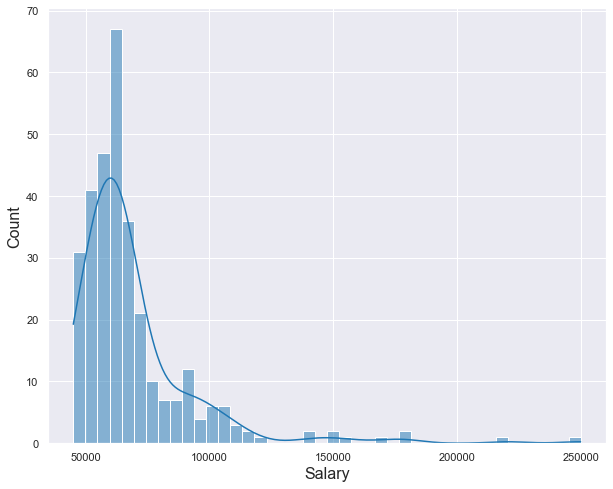

In [69]:
sns.set_style("darkgrid")           
sns.histplot(df['Salary'],kde=True)             
plt.show()

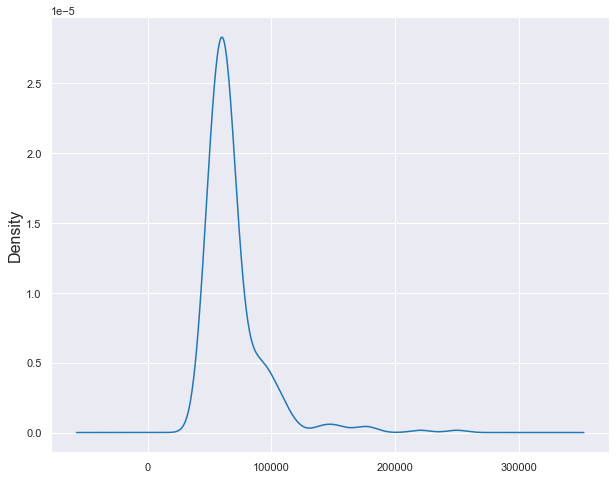

In [70]:
df["Salary"].plot.kde()
plt.show()

## 2.5 Distribuzione salario per genere

Il boxplot mostra la distribuzione dei salari per genere.
<br/>Per gli uomini, abbiamo una distribuzione più ampia che va 76.000 \\$ ca. a 56.000\\$ ca.
<bt/>Per le donne invece, la distribuzione è più ristretta: i salari si concentrano per la maggior parte tra 69.000\\$ e 55.000\\$ ca.
<br/>Per le donne però ci sono anche molti più casi di outliers, valori che si discostano di molto dalla media, dovuti alle posizioni ricoperte.

In [71]:
px.box(df, x = "Sex", y = "Salary", title = "Distribuzione salario per genere con outliers")

In [72]:
px.box(NORMAL, x = "Sex", y = "Salary", title = "Distribuzione salario per genere senza outliers")

In [73]:
Summary = pd.crosstab(OUTLIERS['Sex'], OUTLIERS['Position'])
Summary

Position,BI Developer,BI Director,CIO,Data Architect,Database Administrator,Director of Operations,Director of Sales,Enterprise Architect,IT Director,IT Manager - DB,IT Manager - Infra,IT Manager - Support,President & CEO,Principal Data Architect,Software Engineer,Sr. Accountant,Sr. DBA,Sr. Network Engineer
Sex,,,,,,,,,,,,,,,,,,
F,0,0,1,1,4,0,1,0,0,0,0,0,1,1,3,2,1,1
M,1,1,0,0,1,1,0,1,1,2,1,1,0,0,2,0,1,0


## 2.6 Differenze salario per cittadinanza

Dal grafico a barre a sinistra osserviamo il salario medio degli impiegati in base ai diversi stati di cittadinanza. Da quest'ultimo appare che gli impiegati “Eligibile NonCitizen” e “Non Citizen” guadagnino di più rispetto agli impiegati “US Citizen”. Tuttavia, basare le nostre deduzioni esclusivamente su questo grafico sarebbe fuorviante dal momento che, come visibile dal grafico a barre sulla destra, è possibile vedere che il numero di impiegati “Eligibile NonCitizen” e “NonCitizen” è nettamente inferiore a quello degli impiegati “US Citizen”.

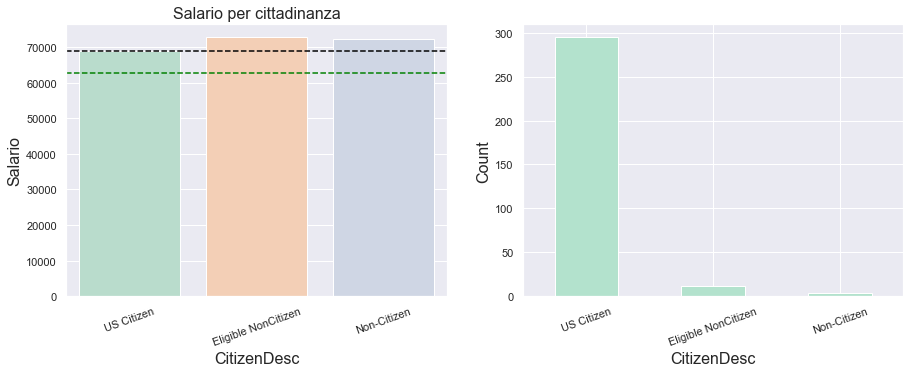

In [74]:
plt.rcParams["figure.figsize"] = [15,5]
plt.subplot(1,2,1)
sns.barplot(x="CitizenDesc", y="Salary", palette = sns.color_palette(colors), data=df, ci=None)
plt.title("Salario per cittadinanza")
plt.xticks(rotation=20)
plt.xlabel("CitizenDesc")
plt.ylabel("Salario")
plt.axhline(df["Salary"].mean(), color="k", linestyle="--")
plt.axhline(df["Salary"].median(), color="g", linestyle="--")

plt.subplot(1,2,2)
sizesCD = df['CitizenDesc'].value_counts()
colors = ['#b3e2cd','#fdcdac','#cbd5e8']
sizesCD.plot(kind='bar', color = "#b3e2cd")
plt.xticks(rotation=20)
plt.xlabel("CitizenDesc")
plt.ylabel("Count")
plt.show()

In [75]:
USCitizen = df[df["CitizenDesc"] == "US Citizen"]
USCitizen["Salary"].describe()

count       295.000000
mean      68822.877966
std       25149.605103
min       45046.000000
25%       55157.500000
50%       62514.000000
75%       71818.000000
max      250000.000000
Name: Salary, dtype: float64

In [76]:
ENC = df[df["CitizenDesc"] == "Eligible NonCitizen"]
ENC["Salary"].describe()

count        12.000000
mean      72768.333333
std       28519.877264
min       46799.000000
25%       58343.000000
50%       65889.500000
75%       74751.750000
max      157000.000000
Name: Salary, dtype: float64

In [77]:
NC = df[df["CitizenDesc"] == "Non-Citizen"]
NC["Salary"].describe()

count         4.000000
mean      72366.000000
std       18776.226884
min       60754.000000
25%       62797.000000
50%       64147.000000
75%       73716.000000
max      100416.000000
Name: Salary, dtype: float64

***

<font color='green' size='4px'>Grafico interattivo</font>

In [78]:
px.bar(sizesCD, y = "CitizenDesc", title = "Numero di impiegati per cittadinanza")

***

<font color='green' size='4px'>Grafico 3D salario per genere/dipartimento/ruolo</font>

Dal grafico sottostante è possibile avere una visualizzazione del salario degli impiegati tenendo conto del loro genere, razza e dipartimento. 
<br/>Abbiamo creato un dataframe che escludesse dai dipartimenti *Executive Office* in quanto - come già precisato - presenta un solo elemento, nello specifico il presidente e CEO dell'azienda, che quindi possiede anche il salario più alto.
<br/>La dimensione delle bolle è proporzionale al salario dei dipendenti: si riconferma, infatti, che il dipartimento con salario più alto è *IT/IS*. Inoltre, da questa rappresentazione possiamo aggiungere che nell'azienda tra i dipendenti a guadagnare di più è una donna, nella posizione di *CIO* nel dipartimento *IT/IS*.

In [79]:
dfnoex = df[df['Department']!='Executive Office']
dfnoex.iplot(kind = 'bubble3d', x = 'Position', y= 'Department', z = 'Sex', size = 'Salary', title='Distribuzione salario per genere/dipartimento/ruolo')

## 2.7 Durata dell'impiego in azienda

### 2.7.1 Durata media dell'impiego uomo / donna

Il barplot sottostante mostra la durata media dell'impiego per uomini e donne, calcolata prendendo in analisi il segmento di personale che ha terminato il rapporto lavorativo con l'azienda e sfruttando le variabili numeriche relative alla data di assunzione e alla data di licenziamento.
<br/>Mediamente l'impiego è di poco più lungo per gli uomini (ca. 1330 giorni, equivalenti a ca. 3 anni e 8 mesi) che per le donne (ca. 1215 giorni, equivalenti a ca. 3 anni e 3 mesi).
<br/>Non sembrano quindi esserci particolari differenze di contratto in base al genere.

Affinchè i calcoli riguardassero solamente i dipendenti il cui impiego è terminato e non quelli che ancora lavorano nell'azienda, dal dataframe sono state eliminate le voci con valore *NaN* per l'attributo *Date of Termination*.
Per fare ciò ci si è serviti della funzione di pandas *dropna*.

In [80]:
# CALCOLO DELLA DURATA DELL'IMPIEGO PER LA CATEGORIA UOMINI
df3 = pd.DataFrame(men, columns = ["DateofTermination", "DateofHire"]).dropna(how='all')
df3 = df3.dropna(subset=["DateofTermination"])
a = list(df3['DateofTermination'])
b = list(df3['DateofHire'])
sommaM = 0
for i in range(len(a)):
    l = a[i].split("/")
    giornoT = int(l[1])
    meseT = int(l[0])
    annoT = int(l[2])
    l2 = b[i].split("/")
    giornoH = int(l2[1])
    meseH = int(l2[0])
    annoH = int(l2[2])
    dateT = datetime(annoT, meseT, giornoT)
    dateH = datetime(annoH, meseH, giornoH)
    time = dateT - dateH
    l3 = str(time).split(" ")
    sommaM = sommaM + int(l3[0])
mediaUomini = sommaM / len(a)

In [81]:
# CALCOLO DELLA DURATA DELL'IMPIEGO PER LA CATEGORIA DONNE
df4 = pd.DataFrame(women, columns = ["DateofTermination", "DateofHire"]).dropna(how='all')
df4 = df4.dropna(subset=["DateofTermination"])
a = list(df4['DateofTermination'])
b = list(df4['DateofHire'])
somma = 0
for i in range(len(a)):
    l = a[i].split("/")
    giornoT = int(l[1])
    meseT = int(l[0])
    annoT = int(l[2])
    l2 = b[i].split("/")
    giornoH = int(l2[1])
    meseH = int(l2[0])
    annoH = int(l2[2])
    dateT = datetime(annoT, meseT, giornoT)
    dateH = datetime(annoH, meseH, giornoH)
    time = dateT - dateH
    l4 = str(time).split(" ")
    somma = somma + int(l4[0])
mediaDonne = somma / len(a)

In [82]:
mediaTot = (sommaM + somma)/(len(a)+len(b))
print("In media la durata è (senza distinzioni di genere):", mediaTot)

In media la durata è (senza distinzioni di genere): 1095.6166666666666


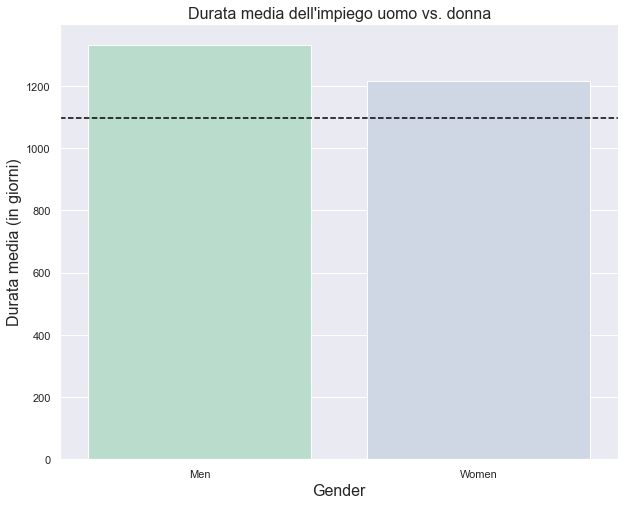

In [83]:
plt.rcParams["figure.figsize"] = [10,8]
g = ["Men", "Women"]
durataMedia = [mediaUomini, mediaDonne]
colors = ['#b3e2cd','#cbd5e8']
sns.barplot(x=g, y=durataMedia, palette = sns.color_palette(colors), ci=None)
sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":16})
plt.title("Durata media dell'impiego uomo vs. donna")
plt.xlabel("Gender")
plt.ylabel("Durata media (in giorni)")
plt.axhline(mediaTot, color="k", linestyle="--")
plt.show()

### 2.7.2 Durata dei rapporti di lavoro per ogni dipendente

Dal momento che sono forniti gli attributi *DateofHire* e *DateofTermination*, è possibile determinare la durata del rapporto di lavoro di ciascun dipendente, per osservare eventuali correlazioni con altri attributi del dataset. Poichè l'attributo DateofTermination comprende dei valori nulli (tutti i valori relativi agli impiegati senza una data di termine servizio, ergo ancora attivi in azienda), abbiamo optato per riempire tali valori con la data 2022-12-12.

In [84]:
df['DateofHire'] = pd.to_datetime(df.DateofHire)
df['DateofTermination'] = pd.to_datetime(df.DateofTermination)
df['DateofTermination'] = df['DateofTermination'].fillna(pd.Timestamp("20221212"))

In [85]:
print (df.DateofTermination)

0     2022-12-12
1     2016-06-16
2     2012-09-24
3     2022-12-12
4     2016-09-06
         ...    
306   2022-12-12
307   2015-09-29
308   2022-12-12
309   2022-12-12
310   2022-12-12
Name: DateofTermination, Length: 311, dtype: datetime64[ns]


In [152]:
from dateutil.relativedelta import relativedelta
m = df[['DateofHire','DateofTermination']].notnull().all(axis=1)
df.loc[m, 'durata'] = df[m].apply(lambda x: relativedelta(x['DateofTermination'], x['DateofHire']).years, axis=1)
print (df.durata)

0      11
1       1
2       1
3      14
4       5
       ..
306     8
307     7
308    12
309     7
310     8
Name: durata, Length: 311, dtype: int64


In [153]:
df["durata"].describe()

count    311.000000
mean       6.864952
std        3.333277
min        0.000000
25%        4.000000
50%        8.000000
75%        9.000000
max       16.000000
Name: durata, dtype: float64

Con un istogramma andiamo ad osservare l'andamento della durata di servizio degli impiegati e notiamo un picco tra gli 8 e i 10 anni di servizio.

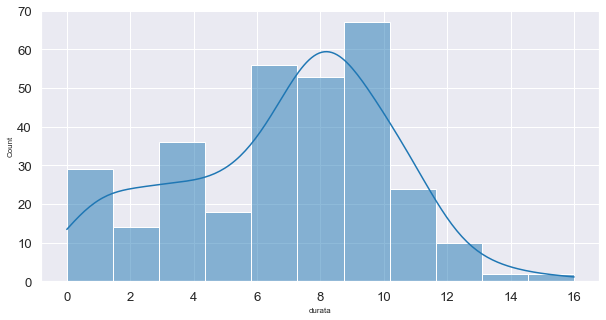

In [154]:
sns.set_style("darkgrid")           
sns.histplot(df['durata'],kde=True)             
plt.show()

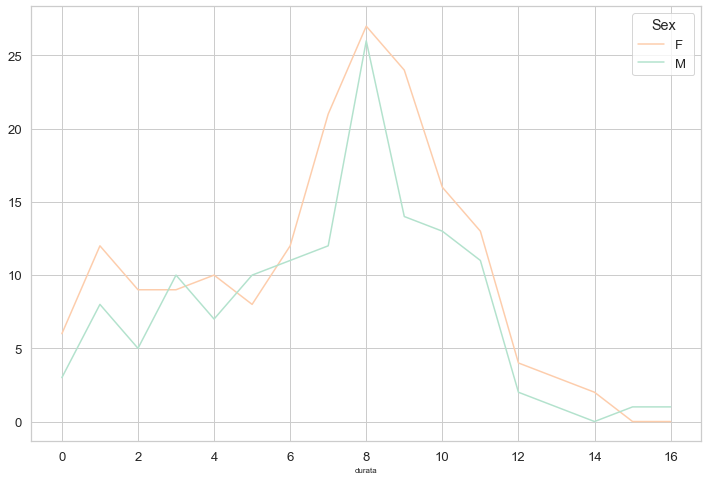

In [155]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set_style("whitegrid")
colors = ['#c2e699','#78c679']
Summary = pd.crosstab(df['durata'], df['Sex'])
Summary.plot(color=['#fdcdac','#b3e2cd'])
plt.show()

## 2.8 EmpSatisfaction uomo e donna

Il grafico sottostante mostra il grado di soddisfazione degli impiegati - in base al genere - su una scala da 1 e 5, risultante da un recente sondaggio svolto. 
<br/>Nonostante dal grafico precedente si riscontri una durata media dell'impiego delle donne inferiore rispetto a quello degli uomini, è possibile notare una votazione al contrario più alta per quest'ultime: il valore ricade per la maggioranza nel range 3-5 (soprattutto votazione 4), a discapito della categoria maschile, per la quale il grado di soddisfazione più frequente risulta essere 3, seguito rispettivamente dal 5 e poi dal 4. 

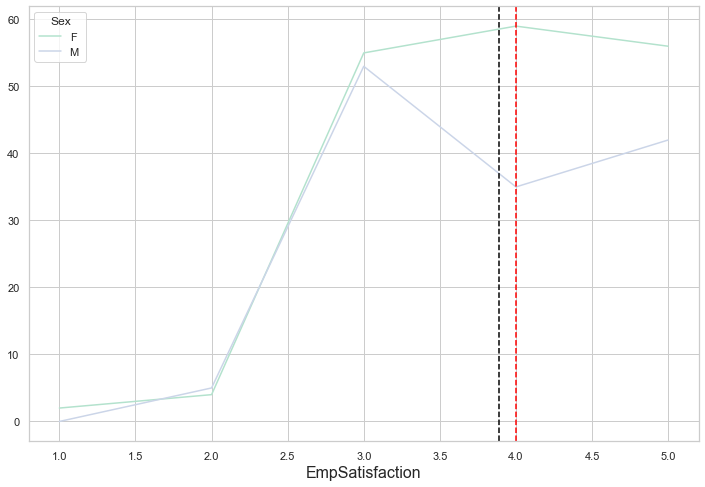

In [90]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set_style("whitegrid")
Summary1 = pd.crosstab(df['EmpSatisfaction'], df['Sex'])
Summary1.plot(color=['#b3e2cd','#cbd5e8'])
plt.xlabel("EmpSatisfaction")
plt.axvline(df["EmpSatisfaction"].mean(), color="k", linestyle="--")
plt.axvline(df["EmpSatisfaction"].median(), color="r", linestyle="--")
plt.show()

Mediamente l'EmpSatisfaction risulta essere di 3.89, mentre la mediana è 4. In questo caso la media è attendibile perchè la deviazione standard non supera il suo 30%. Infatti la maggior parte dei valori cade tra 3 e 5.

In [91]:
print("Media:", df["EmpSatisfaction"].mean(), "\nMediana:", df["EmpSatisfaction"].median())

Media: 3.8906752411575565 
Mediana: 4.0


In [92]:
df["EmpSatisfaction"].describe()

count    311.000000
mean       3.890675
std        0.909241
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: EmpSatisfaction, dtype: float64

In [93]:
print("Moda:", mode(df["EmpSatisfaction"]))

Moda: 3


In [94]:
count1 = df[df["EmpSatisfaction"] == 1]
count2 = df[df["EmpSatisfaction"] == 2]
count3 = df[df["EmpSatisfaction"] == 3]
count4 = df[df["EmpSatisfaction"] == 4]
count5 = df[df["EmpSatisfaction"] == 5]
print("Valori tra 1 e 2:", count1.shape[0]+count2.shape[0], "\nValori tra 3 e 4:", count3.shape[0]+count4.shape[0]+count5.shape[0])

Valori tra 1 e 2: 11 
Valori tra 3 e 4: 300


***

<font color='green' size='4px'>Grafico interattivo</font>

Il grafico interattivo mostra un dato in più rispetto al precedente: lo "spread", una misura di quanto i due andamenti misurati si discostino fra loro.
<br/>In questo caso, le differenze per il campo *EmpSatisfaction* tra donne e uomini sono presenti principalmente per le votazioni più alte, 4 e 5: nel primo caso la differenza tra il numero di donne e il numero di uomini con tale punteggio è di 24, nel secondo caso di 14.
<br/>Le restanti votazioni sono invece abbastanza similimente distribuite tra i generi.

In [95]:
Summary1.iplot(kind = "spread")

C:\Users\catep\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\catep\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



# 3. Analisi sul benessere degli impiegati: condizione occupazionale, motivi di licenziamento, assenze

## 3.1 Motivi di licenziamento

Il grafico mostra quelli che sono i motivi più frequenti di licenziamento all'interno dell'azienda. Da esso si deduce che il motivo principale di termine del rapporto lavorativo è il cambio di carriera, seguito da infelicità e ricerca di maggiore guadagno.

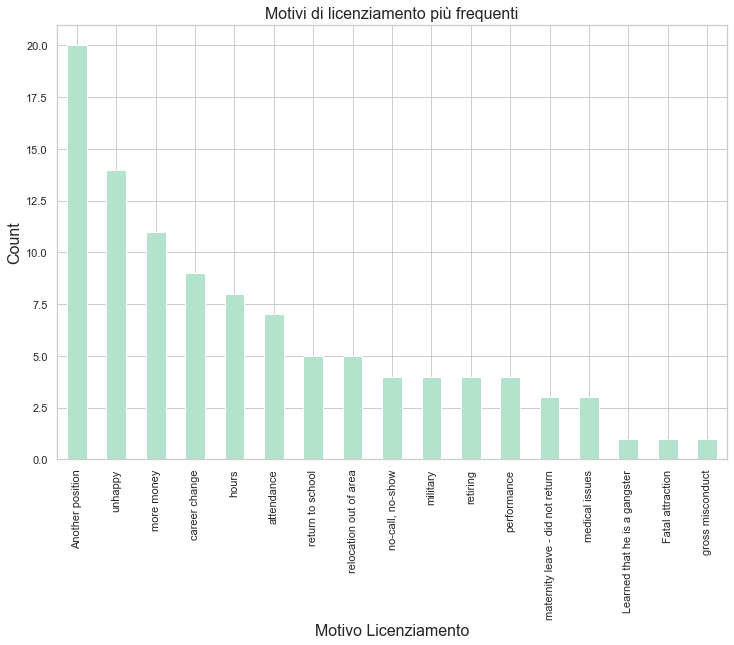

In [96]:
dfLicenziamenti = df.drop(df[df['TermReason'] == 'N/A-StillEmployed'].index)
dfLicenziamenti['TermReason'].value_counts().plot(kind='bar', color='#b3e2cd')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [10,10]
plt.title("Motivi di licenziamento più frequenti")
plt.xlabel("Motivo Licenziamento")
plt.ylabel("Count")
plt.show()

In [97]:
dfLicenziamenti["TermReason"].describe()

count                  104
unique                  17
top       Another position
freq                    20
Name: TermReason, dtype: object

Dal valore di "count" deduciamo anche che il numero di impiegati invece ancora in servizio è di 207.

### 3.1.1 Differenze di motivazioni fra uomo e donna

Il motivo più frequente per le donne è il cambio di posizione lavorativa, il che potrebbe essere potenzialmente correlato alla minore durata media dell’impiego (come visto nel grafico 2.6). Il motivo più frequente per gli uomini è la possibilità di maggiore guadagno.


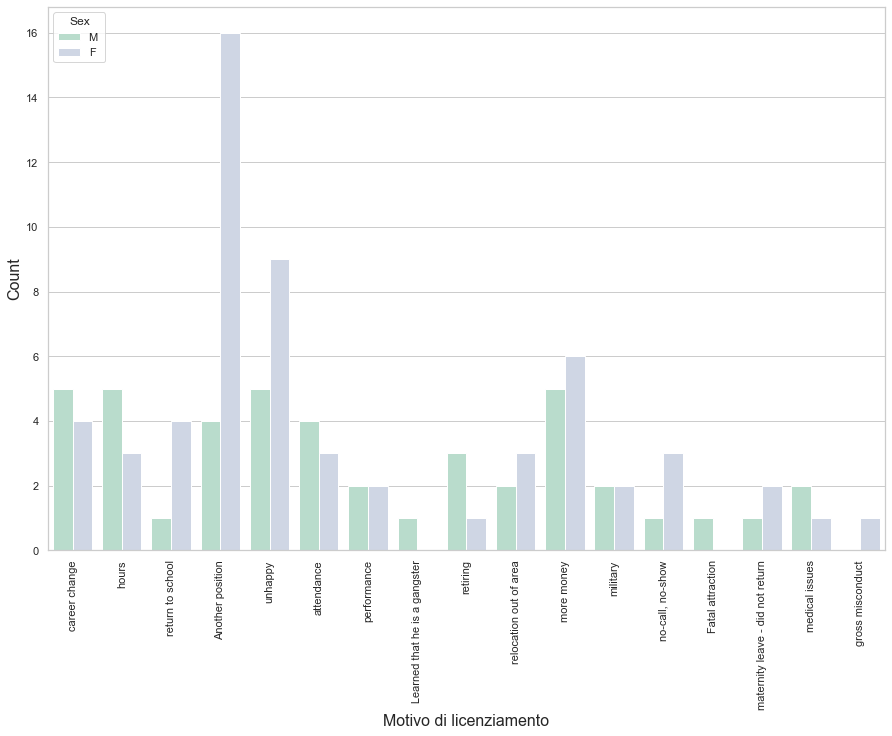

In [98]:
plt.rcParams["figure.figsize"] = [15,10]
colors = ['#b3e2cd','#cbd5e8']
sns.countplot(x='TermReason',hue='Sex',data=dfLicenziamenti, palette = sns.color_palette(colors))
plt.xticks(rotation=90)
plt.xlabel("Motivo di licenziamento")
plt.ylabel("Count")
plt.show()

## 3.2 Employment Status

Il grafico mostra lo stato degli impiegati nell'azienda, distinguendo tra coloro che sono ancora assunti, che sono stati licenziati o che hanno dato le dimissioni volontariamente.
<br/>Si nota che il numero di impiegati che hanno terminato il rapporto di lavoro volontariamente è maggiore rispetto a coloro che sono stati invece licenziati.
<br/>Analizzando la categoria *Voluntarily Terminated* è possibile avere un'idea delle motivazioni prevalenti che hanno portato i dipendenti a lasciare l'impiego: in prima posizione abbiamo *Another Position*, seguito poi da *Unhappy* e da *more money*. In particolare, sono più le donne che gli uomini a lasciare il proprio lavoro spinte da tali motivazioni.
<br/>I dati sono coerenti con i motivi di licenziamento più frequenti mostrati nel grafico 3.1 e 3.1.1.

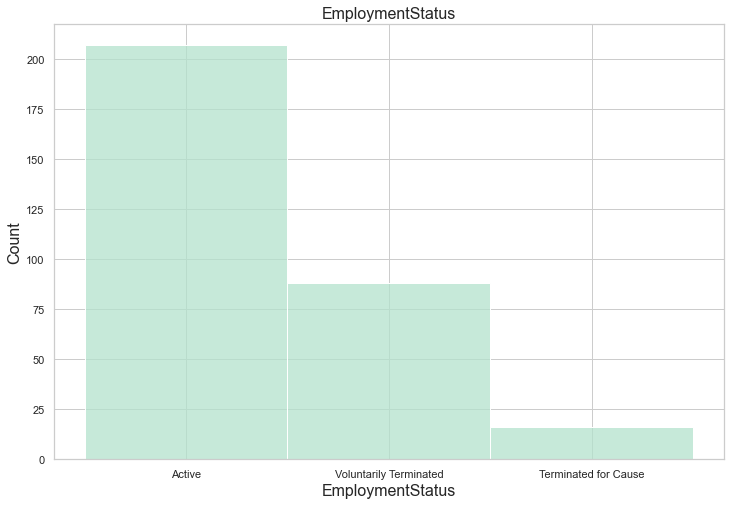

In [99]:
plt.rcParams["figure.figsize"] = [12,8]
sns.histplot(df['EmploymentStatus'],kde=False, color = "#b3e2cd")
sns.set_style("whitegrid")
plt.title("EmploymentStatus")
plt.show()

In [100]:
df["EmploymentStatus"].describe()

count        311
unique         3
top       Active
freq         207
Name: EmploymentStatus, dtype: object

In [101]:
# ANALISI DI VOLUNTARILY TERMINATED PER EMPLOYMENT STATUS
dfVT = df[df["EmploymentStatus"] == "Voluntarily Terminated"]
SummaryVT = pd.crosstab(dfVT['EmploymentStatus'], dfVT['TermReason'])
SummaryVT

TermReason,Another position,attendance,career change,hours,maternity leave - did not return,medical issues,military,more money,performance,relocation out of area,retiring,return to school,unhappy
EmploymentStatus,,,,,,,,,,,,,
Voluntarily Terminated,20,1,9,8,3,3,4,11,1,5,4,5,14


In [102]:
# ANALISI DI VOLUNTARILY TERMINATED PER GENERE
dfVT = df[df["EmploymentStatus"] == "Voluntarily Terminated"]
SummaryVT = pd.crosstab(dfVT['Sex'], dfVT['TermReason'])
SummaryVT

TermReason,Another position,attendance,career change,hours,maternity leave - did not return,medical issues,military,more money,performance,relocation out of area,retiring,return to school,unhappy
Sex,,,,,,,,,,,,,
F,16,0,4,3,2,1,2,6,0,3,1,4,9
M,4,1,5,5,1,2,2,5,1,2,3,1,5


***

<font color='green' size='4px'>Grafico interattivo</font>

In [103]:
df["EmploymentStatus"].iplot(kind = 'hist', bins = 25, barmode = 'overlay', bargap = 0.5, title = "Stato degli impiegati")

## 3.3 Dipartimenti con maggior numero di impieghi cessati

Dal grafico, il dipartimento con maggior numeri di impieghi cessati risulta essere Production. La distribuzione dei licenziamenti è in linea con il numero di impiegati per ogni dipartimento: Production è infatti il dipartimento che ne conta di più, mentre Admin Offices è quello che ne conta di meno.

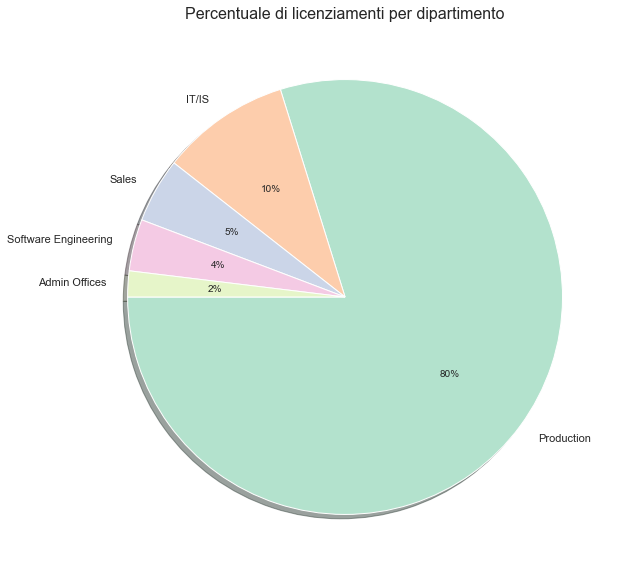

In [104]:
dfTermd = df[df.Termd != 0]
sizesTermd = dfTermd['Department'].value_counts()
sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.titlesize":16,"axes.labelsize":16})
labelsTermd = ['Production', 'IT/IS', 'Sales', 'Software Engineering', 'Admin Offices']
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9']
plt.rcParams["figure.figsize"] = [10,10]
plt.pie(sizesTermd, labels = labelsTermd, autopct = '%1.0f%%', shadow = True, startangle = 180, colors = colors)
plt.title('Percentuale di licenziamenti per dipartimento')
plt.show()

In [105]:
dfTermd["Department"].describe()

count                   104
unique                    5
top       Production       
freq                     83
Name: Department, dtype: object

***

<font color='green' size='4px'>Grafico interattivo</font>

In [106]:
px.pie(df, values = sizesTermd, names = labelsTermd, title = "Percentuale di licenziamenti per dipartimento")

## 3.4 Distribuzione assenze per dipartimento

Il boxplot mostra la distribuzione delle assenze per ogni dipartimento aziendale. 
<br/>Le distribuzioni sono fra loro piuttosto coerenti, non ci sono outliers.
<br/>Il dipartimento *Sales* è quello con una distribuzione di valori più alti, compresi nel range 6 - 17.5, mentre la distribuzione di valori più bassi (compresi tra 3 e 14) è quella del reparto *Software Engineering*.
Il reparto *Executive Office*, al solito, conta un solo impiegato, le cui assenze sono 10. 
</br>14 impiegati hanno 20 assenze, valore massimo comune a quasi tutti i dipartimenti. Il valore minimo è 1 assenza (14 impiegati). 
<br/>Non ci sono invece impiegati che ne contano 0. 

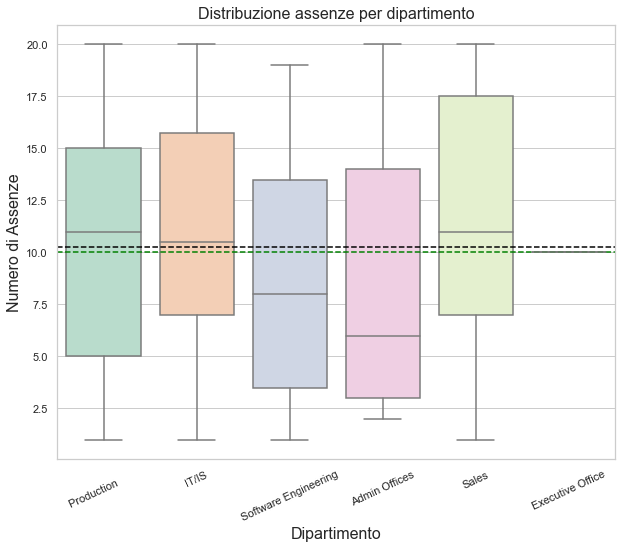

In [107]:
plt.rcParams["figure.figsize"] = [10, 8]
sns.set_context("notebook", font_scale=1, rc={"font.size":15,"axes.titlesize":16,"axes.labelsize":16})
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9']
sns.boxplot(x='Department',y='Absences', palette = sns.color_palette(colors), data=df)
plt.title("Distribuzione assenze per dipartimento")
plt.xlabel("Dipartimento")
plt.ylabel("Numero di Assenze")
plt.axhline(df["Absences"].mean(), color="k", linestyle="--")
plt.axhline(df["Absences"].median(), color="g", linestyle="--")
plt.xticks(rotation=25)
plt.show()

In [108]:
px.box(df, x = "Department", y = "Absences", title = "Distribuzione assenze per dipartimento")

In [109]:
a = df[df["Absences"] == 20]
b = df[df["Absences"] == 0]
c = df[df["Absences"] == 1]
print(a.shape[0], b.shape[0], c.shape[0])

14 0 14


In [110]:
print("Valori massimi e minimi", "\nMax:", df["Absences"].max(), "\nMin:", df["Absences"].min())

Valori massimi e minimi 
Max: 20 
Min: 1


In [111]:
print("Il numero di assenze più frequente è:", mode(df["Absences"]))

Il numero di assenze più frequente è: 4


In [112]:
print("Media di assenze:", df["Absences"].mean(), "\nMediana:", df["Absences"].median(), "\nDeviazione standard:", df["Absences"].std())

Media di assenze: 10.237942122186496 
Mediana: 10.0 
Deviazione standard: 5.8525958627025645


Il numero di assenze è mediamente di 10.24, valore molto vicino anche alla mediana (10) anche se poco robusto, poichè la deviazione standard è superiore al suo 30%. In questo caso è quindi meglio tenere conto del valore mediano.

Rispetto al valore della mediana per i dipartimenti *IT/IS* e *Sales* le distribuzioni si concentrano al di sopra di essa, contrariamente ai dipartimenti *Software Engineering* e *Admin Offices*. La distribuzione per *Production* è invece abbastanza simmetrica rispetto alla mediana.

<font color='green' size='4px'>Studio della distribuzione</font>

Il calcolo di kurtosis ci dice che la curva non è perfettamente gaussiana, la distribuzione mostra un andamento bimodale.
<br/>La skewness invece, essendo un valore tra -0.5 e 0.5, ci dice che i valori sono quasi perfettamente simmetrici.

In [113]:
Kurtosis = sp.kurtosis(df["Absences"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,9))

The kurtosis coefficient is: -1.300354952


In [114]:
skewness = sp.skew(df['Absences'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness)

Il coefficiente di skewness è: 0.029142028352946513


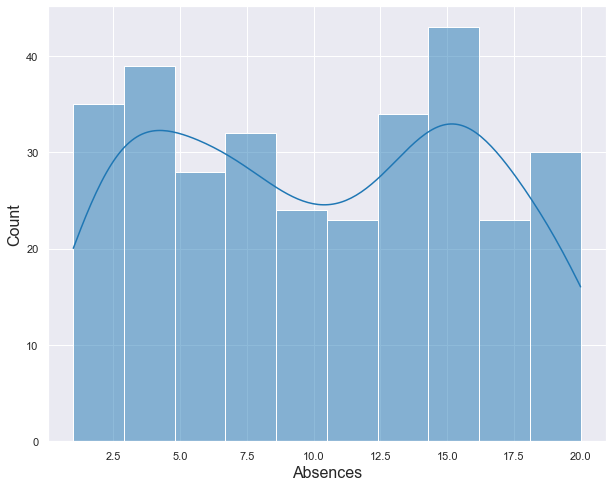

In [115]:
sns.set_style("darkgrid")           
sns.histplot(df['Absences'],kde=True)             
plt.show()

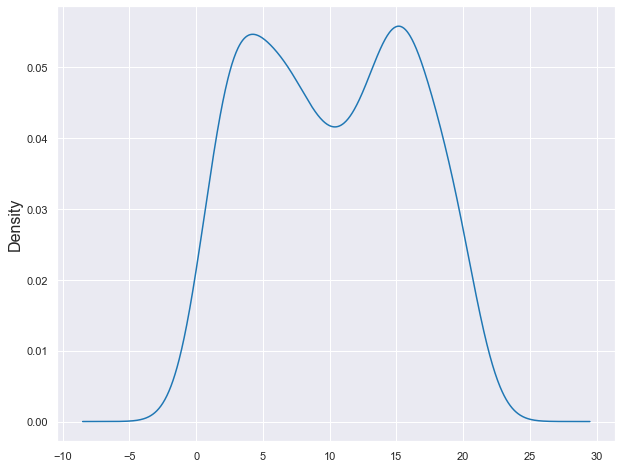

In [116]:
df["Absences"].plot.kde()
plt.show()

***

<font color='green' size='4px'>Grafico 3D</font>

Il grafico sottostante offre una visualizzazione più valida delle distribuzioni di assenze per dipartimento, dal momento che è specificato anche il numero di dipendenti. 
<br/>Il settore con il numero di assenze maggiori (20) è *Production*, composto anche dal maggior numero di dipendenti. Tra i 209 impiegati presenti in questo dipartimento, però, i valori di assenze più frequenti per la maggioranza (17) sono 15 e 4. 

In [117]:
Summary3D = pd.crosstab(df['Absences'], df['Department'])
Summary3D.iplot(kind = 'surface', title = 'Distribuzione assenze per dipartimento')

## 3.5 Andamento assenze uomo e donna

Il lineplot sottostante mostra l'andamento delle assenze per impiegati uomo e donna.
Sia per le donne (6) che per gli uomini (8) il numero massimo di assenze è 20. In totale si contano 176 assenze per le donne e 135 per gli uomini.

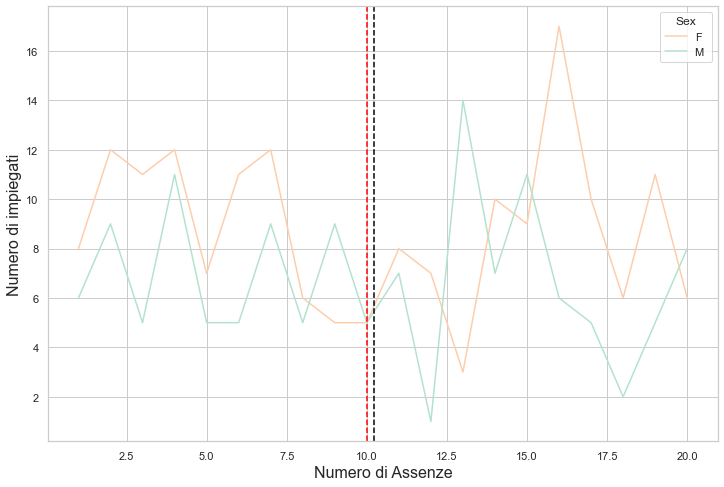

In [118]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set_style("whitegrid")
colors = ['#c2e699','#78c679']
Summary = pd.crosstab(df['Absences'], df['Sex'])
Summary.plot(color=['#fdcdac','#b3e2cd'])
plt.xlabel("Numero di Assenze")
plt.ylabel("Numero di impiegati")
plt.axvline(df["Absences"].mean(), color="k", linestyle="--")
plt.axvline(df["Absences"].median(), color="r", linestyle="--")
plt.show()

Anche qui guardiamo al valore della mediana, piuttosto che a quello della media.

In [119]:
print("Media:", df["Absences"].mean(), "\nMediana:", df["Absences"].median())

Media: 10.237942122186496 
Mediana: 10.0


In [120]:
df["Absences"].describe()

count    311.000000
mean      10.237942
std        5.852596
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Absences, dtype: float64

In [121]:
print("Totale assenze per genere:\n", Summary.sum())

Totale assenze per genere:
 Sex
F     176
M     135
dtype: int64


In [122]:
print("Numero di assenze massimo:", df["Absences"].max(), "\nNumero di assenze minimo:", df["Absences"].min(), "\nAssenze più frequenti:", mode(df["Absences"]))

Numero di assenze massimo: 20 
Numero di assenze minimo: 1 
Assenze più frequenti: 4


***

<font color='green' size='4px'>Grafico interattivo</font>

Anche in questo caso possiamo guardare lo spread per fare delle ulteriori deduzioni: nella maggior parte dei casi le donne con un tot di assenze sono maggiori rispetto agli uomini, il che è ovviamente in linea con il numero complessivo di entrambi i generi.

In [123]:
Summary.iplot(kind = "spread")

C:\Users\catep\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\catep\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



<font color='green' size='4px'>Grafico 3D</font>

Il grafico tridimensionale permette una visualizzazione più chiara delle relazioni tra il numero di assenze e il numero di dipendenti in base al genere.
<br/>Per la maggioranza delle donne (17) il numero più alto di assenze è 16, mentre per la maggioranza degli uomini (14) è 13. 
<br/>In generale, come già evidenziato in precedenza, per entrambi i generi il numero di assenze più alto è 20, mentre il più basso è 1. 

In [124]:
Summary3D = pd.crosstab(df['Absences'], df['Sex'])
Summary3D.iplot(kind = 'surface', title='Distribuzione assenze per genere')

# 4. Analisi di correlazioni

## 4.1 HeatMap e ScatterPlot

Osservando l’heatmap è possibile notare correzionali tra coppie di variabili, come quella tra *DaysLateLast30* e *PerfScoreID* (-0.73) e quella tra *DaysLateLast30* ed *EngagementSurvey* (-0.59).
<br/>Tramite lo scatterplot, abbiamo incrociato le variabili *DaysLateLast30* e *PerfScoreID*: è possibile notare una correlazione negativa dove, all’aumentare dei giorni di ritardo, diminuisce la performance.
Allo stesso modo, abbiamo incrociato le variabili *DaysLateLast30* ed *EngagementSurvey*: anche qui è possibile osservare una correlazione negativa dove, all’aumentare dei giorni di ritardo diminuisce la sensazione di coinvolgimento all’interno della vita aziendale.

In [125]:
newDF2 = pd.DataFrame(df2)
newDF2.drop(['ï»¿Employee_Name','EmpID','Termd', 'DOB', 'DateofHire', 'DateofTermination', "TermReason", 'DeptID', 'GenderID', 'MarriedID'], axis=1,inplace=True)

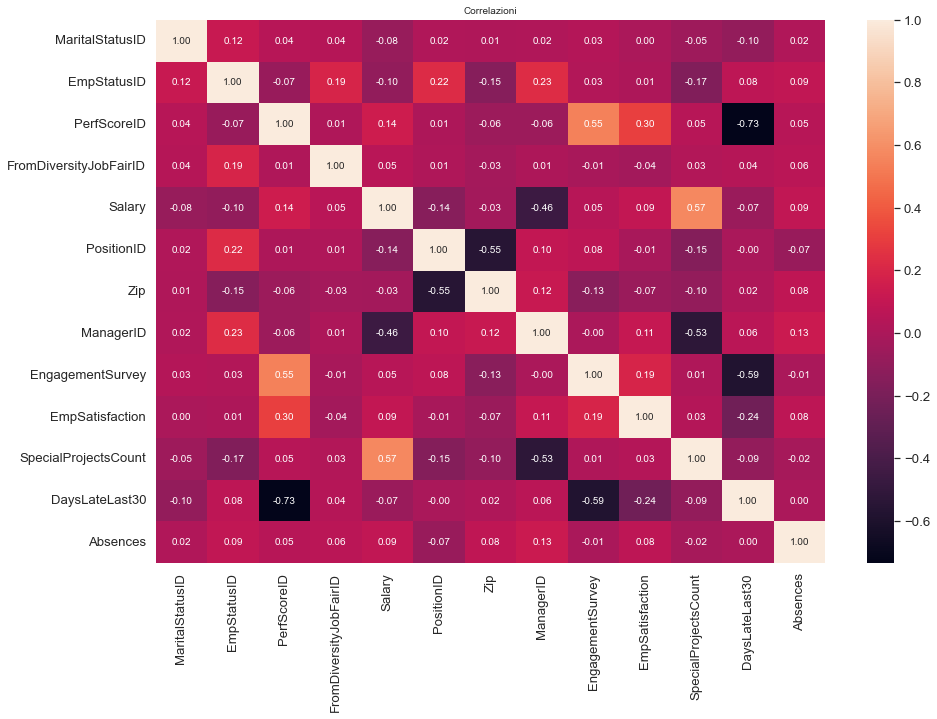

In [126]:
plt.rcParams["figure.figsize"]=[15,10]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(newDF2.corr(), annot=True, fmt=".2f")
plt.title("Correlazioni")
plt.show()

L'output delle funzioni di correlazione è un numero compreso tra -1 e 1:
<br/>• -1: negativamente correlate
<br/>• 0: non possiamo dir nulla su una possibile correlazione lineare
<br/>• 1: positivamente correlate

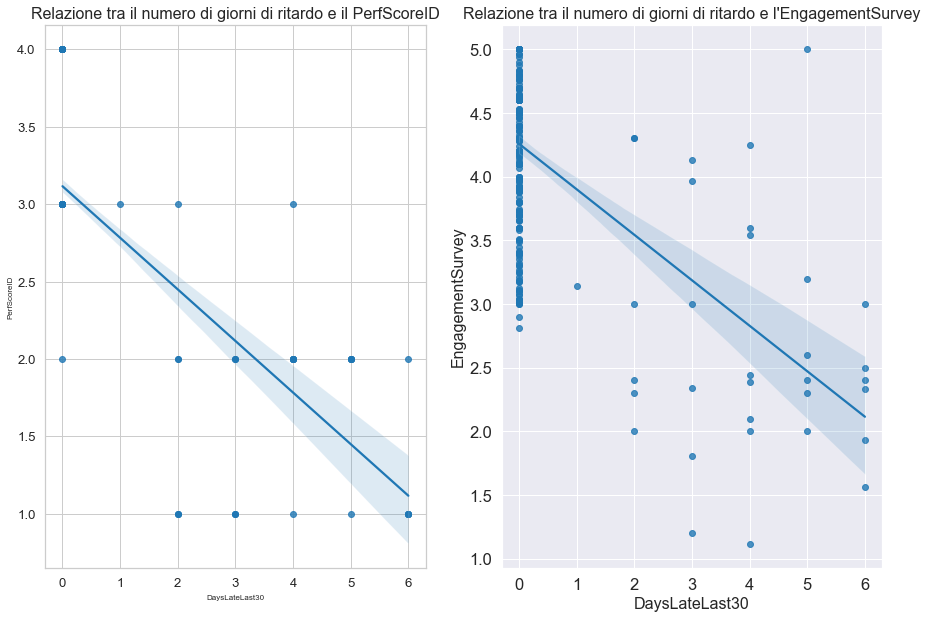

In [127]:
# RELAZIONE TRA GIORNI DI RITARDO E PERFSCOREID
plt.subplot(1,2,1)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
sns.regplot(x="DaysLateLast30", y="PerfScoreID", fit_reg=True, data=df) 
plt.title("Relazione tra il numero di giorni di ritardo e il PerfScoreID")
plt.xlabel("DaysLateLast30")
plt.ylabel("PerfScoreID")

# RELAZIONE TRA GIORNI DI RITARDO E ENGAGMENTSURVEY
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = [20,5]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
sns.regplot(x="DaysLateLast30", y="EngagementSurvey", fit_reg=True, data=df) 
plt.title("Relazione tra il numero di giorni di ritardo e l'EngagementSurvey")
plt.xlabel("DaysLateLast30")
plt.ylabel("EngagementSurvey")
plt.show()

***

<font color='green' size='4px'>Grafici interattivi</font>

In [128]:
newDF2.corr().iplot(kind = 'heatmap', colorscale='spectral')

In [129]:
df.iplot(x = 'DaysLateLast30', y = 'PerfScoreID', mode = 'markers', size = 10, title='Scatter Plot', xTitle='DaysLateLast30', yTitle='PerfScoreID')

In [130]:
df.iplot(x = 'DaysLateLast30', y = 'EngagementSurvey', mode = 'markers', size = 10, title='Scatter Plot', xTitle='DaysLateLast30', yTitle='EngagementSurvey')

<font color='green' size='4px'>Grafico 3D</font>

Lo scatterplot tridimensionale incrocia i dati di *DaysLateLast30*, *PerfScoreID* ed *EngagementSurvey*, permettendo una visualizzazione delle tre variabili in relazione. 
<br/>La dimensione dei punti nel grafico è proporzionale al valore di *EngagementSurvey*. 
<br/>Con questo grafico è possibile visualizzare in modo unitario la correlazione negativa che lega la variabile *DaysLateLast30* con *PerfScoreID* ed *EngagementSurvey*, dove all'aumentare dei giorni di ritardo diminuiscono le altre due.

In [131]:
px.scatter_3d(df, x='DaysLateLast30',y ='PerfScoreID',z='EngagementSurvey', size = 'EngagementSurvey')

## 4.2 PairPlot

Con il PairPlot abbiamo esplorato altre combinazioni di variabili per individuare possibili correlazioni (es. *engagement survey* e *Salary*, *Salary* e *Empsatisfaction*) ma non sono stati ottenuti risultati significativi.

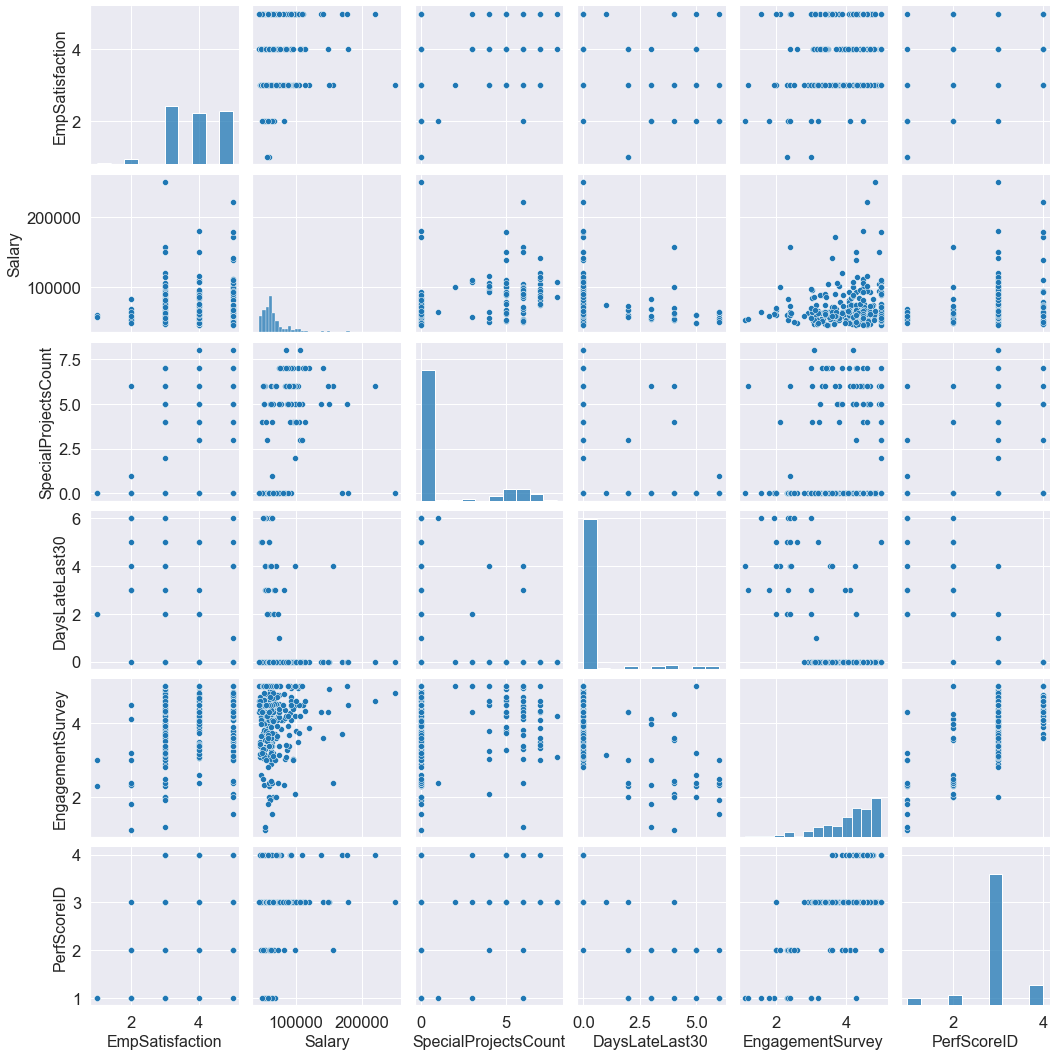

In [132]:
plt.rcParams["figure.figsize"] = [5,15]
sns.pairplot(df, vars = ['EmpSatisfaction', 'Salary', 'SpecialProjectsCount', 'DaysLateLast30', 'EngagementSurvey', 'PerfScoreID'])
plt.show()

## 4.3 Salario e Assenze (con outliers) con kendall

Nell'analisi di un'eventuale correlazione tra le variabili *Salary* e *Absences* abbiamo effettuato il calcolo servendoci di un test non parametrico quale Kendall, il quale non richie né la normalità distributiva delle variabili, né che la relazione sia lineare; inoltre è meno sensibile agli outliers: non è possibile infatti usare l'indice di Pearson, in quanto i valori non sono normalmente distribuiti (kurtosis è un valore molto lontano dallo 0 per *Salary*), non vi è alcuna relazione lineare e sono presenti molti outliers per *Salary*. 

In [133]:
# CALCOLO KURTOSIS
Kurtosis = sp.kurtosis(df["Absences"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: -1.3


In [134]:
Kurtosis = sp.kurtosis(df["Salary"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: 15.19


In [135]:
# NUMERO DI OUTLIERS
OUTLIERS.shape

(29, 36)

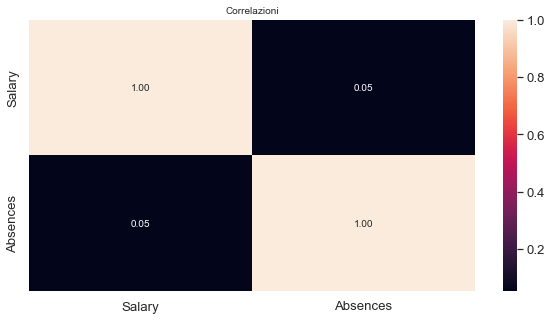

In [136]:
dfCorr = pd.DataFrame(df, columns = ["Salary", "Absences"]).dropna(how='all')
plt.rcParams["figure.figsize"]=[10,5]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(dfCorr.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazioni")
plt.show()

La skewness ci dice che per *Salary* i valori solo leggermente distorti verso destra (asimmetria positiva), mentre per *Absences* sono quasi perfettamente simmetrici.

In [137]:
# CALCOLO SKEWNESS
skewness1 = sp.skew(df['Salary'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness1)
skewness2 = sp.skew(df['Absences'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness2)

Il coefficiente di skewness è: 3.290213187177172
Il coefficiente di skewness è: 0.029142028352946513


## 4.4 Salario e Assenze (senza outliers) con pearson

Per poter osservare il grado di correlazione utilizzando anche Pearson, abbiamo eliminato gli outlier dal dataset in modo da ottenere una distribuzione bilanciata.
Il risultato, in ogni caso, non ci permette di dir nulla su una possibile correlazione lineare tra le due variabili (indice compreso tra -0.5 e 0.5).

In [138]:
Kurtosis = sp.kurtosis(NORMAL["Salary"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: 0.65


In [139]:
Kurtosis = sp.kurtosis(NORMAL["Absences"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: -1.33


In [140]:
# PEARSON
(corr_pearson, pvalue) = sp.pearsonr(NORMAL["Salary"], NORMAL["Absences"])
print(corr_pearson, pvalue)

0.0838413789523789 0.16027241614520676


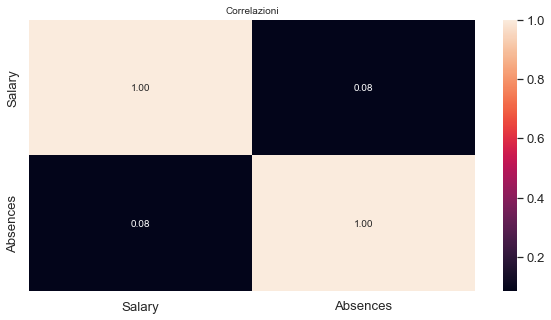

In [141]:
dfCorr = pd.DataFrame(NORMAL, columns = ["Salary", "Absences"]).dropna(how='all')
plt.rcParams["figure.figsize"]=[10,5]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(dfCorr.corr("pearson"), annot=True, fmt=".2f")
plt.title("Correlazioni")
plt.show()

Senza gli outliers, anche per *Salary* la distribuzione dei valori è maggiormente simmetrica.

In [142]:
# CALCOLO SKEWNESS
skewness1 = sp.skew(NORMAL['Salary'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness1)
skewness2 = sp.skew(NORMAL['Absences'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness2)

Il coefficiente di skewness è: 0.9433429468506054
Il coefficiente di skewness è: 0.023232119790912952


## 4.5 DaysLateLast30 e PerfScoreID con kendall

Anche per questa correlazione abbiamo utlizzato l'indice di Kendall, essendo Kurtosis lontano dalla 0 per entrambe le variabili ed avendo *DaysLateLast30* 33 outliers.
<br/>Il risultato è vicino a -1, per cui possiamo ipotizzare ci sia una leggera correlazione negativa tra le variabili.

In [143]:
Kurtosis = sp.kurtosis(df["DaysLateLast30"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: 8.67


In [144]:
Kurtosis = sp.kurtosis(df["PerfScoreID"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: 3.97


In [145]:
Q1 = df['DaysLateLast30'].quantile(0.25, interpolation='linear')
Q3 = df['DaysLateLast30'].quantile(0.75, interpolation='linear')
IQR = Q3 - Q1
Lowerfence = Q1 - 1.5*IQR
Upperfence = Q3 + 1.5*IQR
OUTLIERS2 = df.loc[(df['DaysLateLast30'] < Lowerfence)  |  (df['DaysLateLast30'] > Upperfence) ]
OUTLIERS2.shape[0]

33

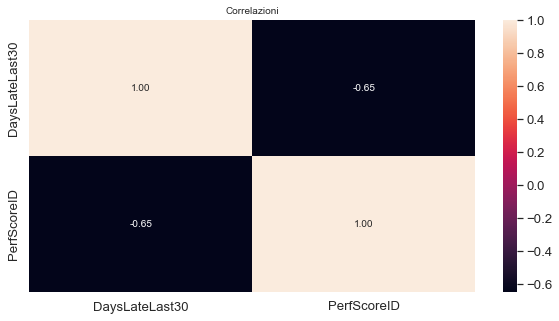

In [146]:
dfCorr = pd.DataFrame(df, columns = ["DaysLateLast30", "PerfScoreID"]).dropna(how='all')
plt.rcParams["figure.figsize"]=[10,5]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(dfCorr.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazioni")
plt.show()

Le distribuzioni sono per entrambe le variabili distorte (per *DaysLateLast30* c'è un'asimmetria positiva, per *PerfScoreID* un'asimmetria negativa).

In [147]:
# CALCOLO SKEWNESS
skewness1 = sp.skew(df['DaysLateLast30'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness1)
skewness2 = sp.skew(df['PerfScoreID'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness2)

Il coefficiente di skewness è: 3.1282858223616987
Il coefficiente di skewness è: -1.2420630702869035


## 4.6 Salario e durata di impiego

Dall'indice di correlazione di Kendall non sembra esserci un legame tra il salario e gli anni di servizio in azienda.

In [156]:
Kurtosis = sp.kurtosis(df["Salary"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: 15.19


In [157]:
Kurtosis = sp.kurtosis(df["durata"],fisher=True, nan_policy='omit')
print("The kurtosis coefficient is:", round(Kurtosis,2))

The kurtosis coefficient is: -0.53


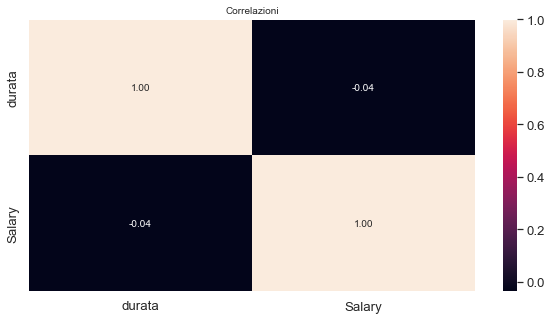

In [158]:
dfCorr = pd.DataFrame(df, columns = ["durata", "Salary"]).dropna(how='all')
plt.rcParams["figure.figsize"]=[10,5]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(dfCorr.corr("kendall"), annot=True, fmt=".2f")
plt.title("Correlazioni")
plt.show()

In [159]:
# CALCOLO SKEWNESS
skewness1 = sp.skew(df['Salary'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness1)
skewness2 = sp.skew(df['durata'], nan_policy="omit")
print("Il coefficiente di skewness è:", skewness2)

Il coefficiente di skewness è: 3.290213187177172
Il coefficiente di skewness è: -0.2953809889803109
